
## Import dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
gas_prices_brazil_df = pd.read_csv('https://drive.google.com/uc?id=1CgI-6f3l6i0vX_35tjQPOu7ltpbnIYiE')

### Drop Column 

In [3]:
gas_prices_brazil_df = gas_prices_brazil_df.drop(['Unnamed: 0'], axis=1)

### Columns Info

In [4]:
gas_prices_brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   regiao                      106823 non-null  object 
 1   estado                      106823 non-null  object 
 2   produto                     106823 non-null  object 
 3   numero_posto_pesquisado     106823 non-null  int64  
 4   preco_medio_revenda         106823 non-null  float64
 5   coef_variacao_revenda       106823 non-null  float64
 6   preco_medio_distribuicao    106823 non-null  object 
 7   coef_variacao_distribuicao  106823 non-null  object 
 8   data_inicial                106823 non-null  object 
 9   data_final                  106823 non-null  object 
 10  mes                         106823 non-null  int64  
 11  ano                         106823 non-null  int64  
 12  desvio_padrao_revenda       106823 non-null  float64
 13  preco_minimo_r

### Head Info

In [5]:
gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.11,0.4201,0.9666,R$/l
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05,R$/l
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.161,R$/l
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.24,0.077,0.7441,1.0317,R$/l


---



---
# 1 Definição de Tipos
---



---

### Set Data Type

In [6]:
gas_prices_brazil_df.dtypes

regiao                         object
estado                         object
produto                        object
numero_posto_pesquisado         int64
preco_medio_revenda           float64
coef_variacao_revenda         float64
preco_medio_distribuicao       object
coef_variacao_distribuicao     object
data_inicial                   object
data_final                     object
mes                             int64
ano                             int64
desvio_padrao_revenda         float64
preco_minimo_revenda          float64
preco_maximo_revenda          float64
margem_media_revenda           object
desvio_padrao_distribuicao     object
preco_minimo_distribuicao      object
preco_maximo_distribuicao      object
unidade_de_medida              object
dtype: object

In [7]:

# values from preco_medio_distribuicao column contains "-"
gas_prices_brazil_df['preco_medio_distribuicao'] = gas_prices_brazil_df['preco_medio_distribuicao'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['preco_medio_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_medio_distribuicao'], downcast='float')
gas_prices_brazil_df['preco_medio_distribuicao'] = gas_prices_brazil_df['preco_medio_distribuicao'].astype('float')

# values from coef_variacao_distribuicao column contains "-"
gas_prices_brazil_df['coef_variacao_distribuicao'] = gas_prices_brazil_df['coef_variacao_distribuicao'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['coef_variacao_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['coef_variacao_distribuicao'], downcast='float')
gas_prices_brazil_df['coef_variacao_distribuicao'] = gas_prices_brazil_df['coef_variacao_distribuicao'].astype('float')

#gas_prices_brazil_df['preco_minimo_revenda'] = pd.to_numeric(gas_prices_brazil_df['preco_minimo_revenda'], downcast='float')
#gas_prices_brazil_df['preco_maximo_revenda'] = pd.to_numeric(gas_prices_brazil_df['preco_maximo_revenda'], downcast='float')
gas_prices_brazil_df['preco_minimo_revenda'] = gas_prices_brazil_df['preco_minimo_revenda'].astype('float')

# CASE TO INVASTIGATE values from margem_media_revenda column contains "-"
gas_prices_brazil_df['preco_maximo_revenda'] = gas_prices_brazil_df['preco_maximo_revenda'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['margem_media_revenda'] = pd.to_numeric(gas_prices_brazil_df['margem_media_revenda'], downcast='float')
#gas_prices_brazil_df['preco_maximo_revenda'] = gas_prices_brazil_df['preco_maximo_revenda'].astype('float')

# values from margem_media_revenda column contains "-"
#gas_prices_brazil_df['margem_media_revenda'] = pd.to_numeric(gas_prices_brazil_df['margem_media_revenda'], downcast='float')
gas_prices_brazil_df['margem_media_revenda'] = gas_prices_brazil_df['margem_media_revenda'].apply(lambda x : 0 if x == '-' else x)
gas_prices_brazil_df['margem_media_revenda'] = gas_prices_brazil_df['margem_media_revenda'].astype('float')


gas_prices_brazil_df['desvio_padrao_distribuicao'] = gas_prices_brazil_df['desvio_padrao_distribuicao'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['desvio_padrao_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['desvio_padrao_distribuicao'], downcast='float')
gas_prices_brazil_df['desvio_padrao_distribuicao'] = gas_prices_brazil_df['desvio_padrao_distribuicao'].astype('float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['preco_minimo_distribuicao'] = gas_prices_brazil_df['preco_minimo_distribuicao'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['preco_minimo_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_minimo_distribuicao'], downcast='float')
gas_prices_brazil_df['preco_minimo_distribuicao'] = gas_prices_brazil_df['preco_minimo_distribuicao'].astype('float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['preco_maximo_distribuicao'] = gas_prices_brazil_df['preco_maximo_distribuicao'].apply(lambda x : 0 if x == '-' else x)
#gas_prices_brazil_df['preco_maximo_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_maximo_distribuicao'], downcast='float')
gas_prices_brazil_df['preco_maximo_distribuicao'] = gas_prices_brazil_df['preco_maximo_distribuicao'].astype('float')



## Transform to categories

In [8]:
gas_prices_brazil_df['regiao'] = gas_prices_brazil_df['regiao'].astype('category')
gas_prices_brazil_df['estado'] = gas_prices_brazil_df['estado'].astype('category')
gas_prices_brazil_df['produto'] = gas_prices_brazil_df['produto'].astype('category')

In [9]:
gas_prices_brazil_df.dtypes

regiao                        category
estado                        category
produto                       category
numero_posto_pesquisado          int64
preco_medio_revenda            float64
coef_variacao_revenda          float64
preco_medio_distribuicao       float64
coef_variacao_distribuicao     float64
data_inicial                    object
data_final                      object
mes                              int64
ano                              int64
desvio_padrao_revenda          float64
preco_minimo_revenda           float64
preco_maximo_revenda           float64
margem_media_revenda           float64
desvio_padrao_distribuicao     float64
preco_minimo_distribuicao      float64
preco_maximo_distribuicao      float64
unidade_de_medida               object
dtype: object

## Transform Category to Code

In [10]:
gas_prices_brazil_df['regiao_code'] = gas_prices_brazil_df['regiao'].cat.codes
gas_prices_brazil_df['estado_code'] = gas_prices_brazil_df['estado'].cat.codes
gas_prices_brazil_df['produto_code'] = gas_prices_brazil_df['produto'].cat.codes

In [11]:
gas_prices_brazil_df[['regiao_code', 'estado_code', 'produto_code']].head()

,regiao_code,estado_code,produto_code
0,0,6,0
1,0,8,0
2,0,10,0
3,0,11,0
4,1,1,0


---



---
# 2 Tratamento de Dados Ausentes
---



---

## Check Null Values

In [12]:
gas_prices_brazil_df.isnull().sum()

regiao                        0
estado                        0
produto                       0
numero_posto_pesquisado       0
preco_medio_revenda           0
coef_variacao_revenda         0
preco_medio_distribuicao      0
coef_variacao_distribuicao    0
data_inicial                  0
data_final                    0
mes                           0
ano                           0
desvio_padrao_revenda         0
preco_minimo_revenda          0
preco_maximo_revenda          0
margem_media_revenda          0
desvio_padrao_distribuicao    0
preco_minimo_distribuicao     0
preco_maximo_distribuicao     0
unidade_de_medida             0
regiao_code                   0
estado_code                   0
produto_code                  0
dtype: int64

In [13]:
gas_prices_brazil_df.shape

(106823, 23)

### Check Types

In [14]:
gas_prices_brazil_df.dtypes

regiao                        category
estado                        category
produto                       category
numero_posto_pesquisado          int64
preco_medio_revenda            float64
coef_variacao_revenda          float64
preco_medio_distribuicao       float64
coef_variacao_distribuicao     float64
data_inicial                    object
data_final                      object
mes                              int64
ano                              int64
desvio_padrao_revenda          float64
preco_minimo_revenda           float64
preco_maximo_revenda           float64
margem_media_revenda           float64
desvio_padrao_distribuicao     float64
preco_minimo_distribuicao      float64
preco_maximo_distribuicao      float64
unidade_de_medida               object
regiao_code                       int8
estado_code                       int8
produto_code                      int8
dtype: object

### Check Correlation

In [15]:
interess_columns  = ['numero_posto_pesquisado', 'preco_medio_revenda', 'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']

gas_prices_brazil_df[interess_columns].corr(method='spearman')

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,0.032969,0.294354,0.120888,0.165392
preco_medio_revenda,0.032969,1.000000,0.189490,0.926830,0.061463
coef_variacao_revenda,0.294354,0.189490,1.000000,0.185918,0.474178
preco_medio_distribuicao,0.120888,0.926830,0.185918,1.000000,0.126634
coef_variacao_distribuicao,0.165392,0.061463,0.474178,0.126634,1.000000


### Describe Statiscal Info

In [16]:
gas_prices_brazil_df[interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.045418,8.285580,0.045152
std,403.282519,17.752533,0.025066,13.469061,0.042258
min,1.000000,0.766000,0.000000,0.000000,0.000000
25%,42.000000,2.072000,0.029000,1.745000,0.020000
50%,104.000000,2.718000,0.041000,2.303000,0.030000
75%,243.000000,3.752000,0.058000,3.265000,0.059000
max,4167.000000,99.357000,0.395000,83.137000,0.780000


---



---
# 3 Normalização e Discretização
---



---

## Normalization

In [17]:
interess_columns  = ['numero_posto_pesquisado', 'preco_medio_revenda', 'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']
num_gas_prices_brazil_df = gas_prices_brazil_df[interess_columns]

dist = np.linalg.norm(num_gas_prices_brazil_df.values[1]-num_gas_prices_brazil_df.values[2])
dist

195.00024474600025

In [18]:
# (xi - x(min)) / (x(max) - x(min))
norm_gas_prices_brazil_df =  (num_gas_prices_brazil_df - num_gas_prices_brazil_df.min()) / (num_gas_prices_brazil_df.max() - num_gas_prices_brazil_df.min())
norm_gas_prices_brazil_df.head()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
0,0.030245,0.005295,0.030380,0.009923,0.170513
1,0.092655,0.004017,0.248101,0.009178,0.147436
2,0.045847,0.006319,0.177215,0.011667,0.125641
3,0.038646,0.005031,0.139241,0.009984,0.183333
4,0.024484,0.004209,0.167089,0.011319,0.105128


In [19]:
dist = np.linalg.norm(norm_gas_prices_brazil_df.values[1]-norm_gas_prices_brazil_df.values[2])
dist

0.08776271369332381

In [20]:
gas_prices_brazil_df['numero_posto_pesquisado_norm'] = (gas_prices_brazil_df['numero_posto_pesquisado'] - gas_prices_brazil_df['numero_posto_pesquisado'].min()) / (gas_prices_brazil_df['numero_posto_pesquisado'].max() - gas_prices_brazil_df['numero_posto_pesquisado'].min())

gas_prices_brazil_df['numero_posto_pesquisado_norm'].describe()


count    106823.000000
mean          0.055874
std           0.096803
min           0.000000
25%           0.009842
50%           0.024724
75%           0.058089
max           1.000000
Name: numero_posto_pesquisado_norm, dtype: float64

### preco_medio_revenda_norm

In [21]:
gas_prices_brazil_df['preco_medio_revenda_norm'] = (gas_prices_brazil_df['preco_medio_revenda'] - gas_prices_brazil_df['preco_medio_revenda'].min()) / (gas_prices_brazil_df['preco_medio_revenda'].max() - gas_prices_brazil_df['preco_medio_revenda'].min())
gas_prices_brazil_df['preco_medio_revenda_norm'].describe()


count    106823.000000
mean          0.102492
std           0.180062
min           0.000000
25%           0.013247
50%           0.019799
75%           0.030287
max           1.000000
Name: preco_medio_revenda_norm, dtype: float64

### coef_variacao_revenda_norm

In [22]:
gas_prices_brazil_df['coef_variacao_revenda_norm'] = (gas_prices_brazil_df['coef_variacao_revenda'] - gas_prices_brazil_df['coef_variacao_revenda'].min()) / (gas_prices_brazil_df['coef_variacao_revenda'].max() - gas_prices_brazil_df['coef_variacao_revenda'].min())
gas_prices_brazil_df['coef_variacao_revenda_norm'].describe()


count    106823.000000
mean          0.114982
std           0.063459
min           0.000000
25%           0.073418
50%           0.103797
75%           0.146835
max           1.000000
Name: coef_variacao_revenda_norm, dtype: float64

### desvio_padrao_revenda_norm

In [23]:
gas_prices_brazil_df['desvio_padrao_revenda_norm'] = (gas_prices_brazil_df['desvio_padrao_revenda'] - gas_prices_brazil_df['desvio_padrao_revenda'].min()) / (gas_prices_brazil_df['desvio_padrao_revenda'].max() - gas_prices_brazil_df['desvio_padrao_revenda'].min())
gas_prices_brazil_df['desvio_padrao_revenda_norm'].describe()


count    106823.000000
mean          0.061149
std           0.125527
min           0.000000
25%           0.006699
50%           0.010607
75%           0.017771
max           1.000000
Name: desvio_padrao_revenda_norm, dtype: float64

### preco_minimo_revenda_norm


In [24]:
gas_prices_brazil_df['preco_minimo_revenda_norm'] = (gas_prices_brazil_df['preco_minimo_revenda'] - gas_prices_brazil_df['preco_minimo_revenda'].min()) / (gas_prices_brazil_df['preco_minimo_revenda'].max() - gas_prices_brazil_df['preco_minimo_revenda'].min())
gas_prices_brazil_df['preco_minimo_revenda_norm'].describe()

count    106823.000000
mean          0.098714
std           0.168798
min           0.000000
25%           0.014652
50%           0.021474
75%           0.032536
max           1.000000
Name: preco_minimo_revenda_norm, dtype: float64

### preco_maximo_revenda_norm


In [25]:
gas_prices_brazil_df['preco_maximo_revenda_norm'] = (gas_prices_brazil_df['preco_maximo_revenda'] - gas_prices_brazil_df['preco_maximo_revenda'].min()) / (gas_prices_brazil_df['preco_maximo_revenda'].max() - gas_prices_brazil_df['preco_maximo_revenda'].min())
gas_prices_brazil_df['preco_maximo_revenda_norm'].describe()

count    106823.000000
mean          0.096963
std           0.175137
min           0.000000
25%           0.011017
50%           0.016807
75%           0.026479
max           1.000000
Name: preco_maximo_revenda_norm, dtype: float64

### margem_media_revenda_norm


In [26]:
gas_prices_brazil_df['margem_media_revenda_norm'] = (gas_prices_brazil_df['margem_media_revenda'] - gas_prices_brazil_df['margem_media_revenda'].min()) / (gas_prices_brazil_df['margem_media_revenda'].max() - gas_prices_brazil_df['margem_media_revenda'].min())
gas_prices_brazil_df['margem_media_revenda_norm'].describe()

count    106823.000000
mean          0.058449
std           0.117298
min           0.000000
25%           0.007355
50%           0.010204
75%           0.014818
max           1.000000
Name: margem_media_revenda_norm, dtype: float64

### preco_medio_distribuicao_norm

In [27]:
gas_prices_brazil_df['preco_medio_distribuicao_norm'] = (gas_prices_brazil_df['preco_medio_distribuicao'] - gas_prices_brazil_df['preco_medio_distribuicao'].min()) / (gas_prices_brazil_df['preco_medio_distribuicao'].max() - gas_prices_brazil_df['preco_medio_distribuicao'].min())
gas_prices_brazil_df['preco_medio_distribuicao_norm'].describe()


count    106823.000000
mean          0.099662
std           0.162010
min           0.000000
25%           0.020989
50%           0.027701
75%           0.039273
max           1.000000
Name: preco_medio_distribuicao_norm, dtype: float64

### coef_variacao_distribuicao_norm

In [28]:
gas_prices_brazil_df['coef_variacao_distribuicao_norm'] = (gas_prices_brazil_df['coef_variacao_distribuicao'] - gas_prices_brazil_df['coef_variacao_distribuicao'].min()) / (gas_prices_brazil_df['coef_variacao_distribuicao'].max() - gas_prices_brazil_df['coef_variacao_distribuicao'].min())
gas_prices_brazil_df['coef_variacao_distribuicao_norm'].describe()


count    106823.000000
mean          0.057887
std           0.054177
min           0.000000
25%           0.025641
50%           0.038462
75%           0.075641
max           1.000000
Name: coef_variacao_distribuicao_norm, dtype: float64

### desvio_padrao_distribuicao_norm

In [29]:
gas_prices_brazil_df['desvio_padrao_distribuicao_norm'] = (gas_prices_brazil_df['coef_variacao_distribuicao'] - gas_prices_brazil_df['coef_variacao_distribuicao'].min()) / (gas_prices_brazil_df['coef_variacao_distribuicao'].max() - gas_prices_brazil_df['coef_variacao_distribuicao'].min())
gas_prices_brazil_df['desvio_padrao_distribuicao_norm'].describe()

count    106823.000000
mean          0.057887
std           0.054177
min           0.000000
25%           0.025641
50%           0.038462
75%           0.075641
max           1.000000
Name: desvio_padrao_distribuicao_norm, dtype: float64

### preco_minimo_distribuicao_norm

In [30]:
gas_prices_brazil_df['preco_minimo_distribuicao_norm'] = (gas_prices_brazil_df['preco_minimo_distribuicao'] - gas_prices_brazil_df['preco_minimo_distribuicao'].min()) / (gas_prices_brazil_df['preco_minimo_distribuicao'].max() - gas_prices_brazil_df['preco_minimo_distribuicao'].min())
gas_prices_brazil_df['preco_minimo_distribuicao_norm'].describe()

count    106823.000000
mean          0.086478
std           0.139360
min           0.000000
25%           0.019614
50%           0.026386
75%           0.037326
max           1.000000
Name: preco_minimo_distribuicao_norm, dtype: float64

### preco_maximo_distribuicao_norm

In [31]:
gas_prices_brazil_df['preco_maximo_distribuicao_norm'] = (gas_prices_brazil_df['preco_maximo_distribuicao'] - gas_prices_brazil_df['preco_maximo_distribuicao'].min()) / (gas_prices_brazil_df['preco_maximo_distribuicao'].max() - gas_prices_brazil_df['preco_maximo_distribuicao'].min())
gas_prices_brazil_df['preco_maximo_distribuicao_norm'].describe()

count    106823.000000
mean          0.100443
std           0.166897
min           0.000000
25%           0.020048
50%           0.026182
75%           0.036712
max           1.000000
Name: preco_maximo_distribuicao_norm, dtype: float64

In [32]:
gas_prices_brazil_df.dtypes

regiao                             category
estado                             category
produto                            category
numero_posto_pesquisado               int64
preco_medio_revenda                 float64
coef_variacao_revenda               float64
preco_medio_distribuicao            float64
coef_variacao_distribuicao          float64
data_inicial                         object
data_final                           object
mes                                   int64
ano                                   int64
desvio_padrao_revenda               float64
preco_minimo_revenda                float64
preco_maximo_revenda                float64
margem_media_revenda                float64
desvio_padrao_distribuicao          float64
preco_minimo_distribuicao           float64
preco_maximo_distribuicao           float64
unidade_de_medida                    object
regiao_code                            int8
estado_code                            int8
produto_code                    

## Discretization 

### preco_medio_revenda_dist

In [33]:
gas_prices_brazil_df['preco_medio_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_revenda'],10)

In [34]:
gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()

(0.667, 10.625]     85637
(30.343, 40.202]     9705
(40.202, 50.062]     4813
(50.062, 59.921]     2477
(59.921, 69.78]      1844
(69.78, 79.639]      1107
(20.484, 30.343]      951
(79.639, 89.498]      199
(89.498, 99.357]       90
(10.625, 20.484]        0
Name: preco_medio_revenda_dist, dtype: int64

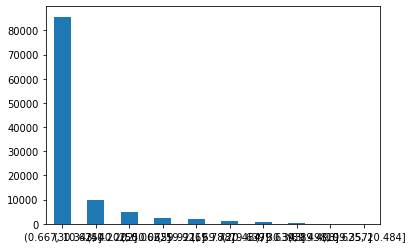

In [35]:
counts = gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()
counts.plot.bar(rot=0)

In [36]:
gas_prices_brazil_df['preco_medio_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_revenda'],4)

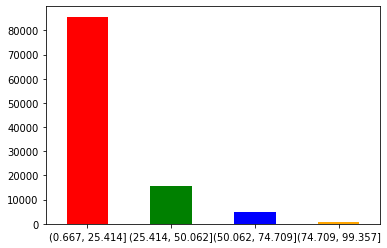

In [37]:
counts = gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### coef_variacao_revenda_dist

In [38]:
gas_prices_brazil_df['coef_variacao_revenda_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_revenda'],10)

In [39]:
gas_prices_brazil_df['coef_variacao_revenda_dist'].value_counts()

(-0.000395, 0.0395]    49520
(0.0395, 0.079]        47313
(0.079, 0.118]          8607
(0.118, 0.158]          1262
(0.158, 0.198]           102
(0.198, 0.237]            13
(0.237, 0.276]             3
(0.356, 0.395]             1
(0.316, 0.356]             1
(0.276, 0.316]             1
Name: coef_variacao_revenda_dist, dtype: int64

In [40]:
gas_prices_brazil_df['coef_variacao_revenda_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_revenda'],4)

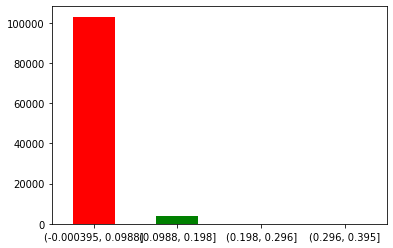

In [41]:
counts = gas_prices_brazil_df['coef_variacao_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### desvio_padrao_revenda_dist

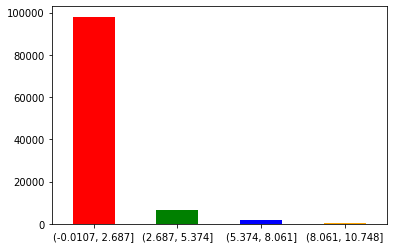

In [42]:
gas_prices_brazil_df['desvio_padrao_revenda_dist'] = pd.cut(gas_prices_brazil_df['desvio_padrao_revenda'],10)
gas_prices_brazil_df['desvio_padrao_revenda_dist'].value_counts()

gas_prices_brazil_df['desvio_padrao_revenda_dist'] = pd.cut(gas_prices_brazil_df['desvio_padrao_revenda'],4)


counts = gas_prices_brazil_df['desvio_padrao_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_minimo_revenda_dist

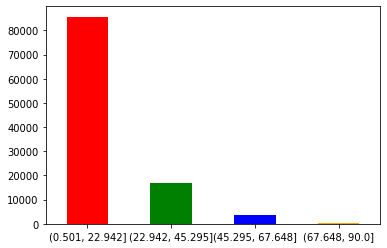

In [43]:
gas_prices_brazil_df['preco_minimo_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_minimo_revenda'],10)
gas_prices_brazil_df['preco_minimo_revenda_dist'].value_counts()

gas_prices_brazil_df['preco_minimo_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_minimo_revenda'],4)


counts = gas_prices_brazil_df['preco_minimo_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_maximo_revenda_dist

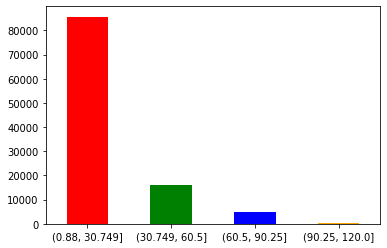

In [44]:
gas_prices_brazil_df['preco_maximo_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_maximo_revenda'],10)

gas_prices_brazil_df['preco_maximo_revenda_dist'].value_counts()

gas_prices_brazil_df['preco_maximo_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_maximo_revenda'],4)


counts = gas_prices_brazil_df['preco_maximo_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### margem_media_revenda_dist

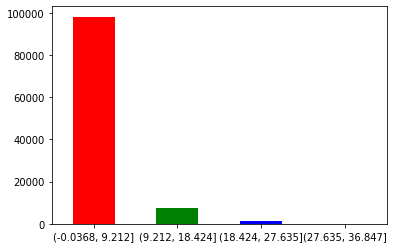

In [45]:
gas_prices_brazil_df['margem_media_revenda_dist'] = pd.cut(gas_prices_brazil_df['margem_media_revenda'],10)

gas_prices_brazil_df['margem_media_revenda_dist'].value_counts()

gas_prices_brazil_df['margem_media_revenda_dist'] = pd.cut(gas_prices_brazil_df['margem_media_revenda'],4)


counts = gas_prices_brazil_df['margem_media_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_medio_distribuicao_dist

In [46]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_distribuicao'],10)


In [47]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'].value_counts()

(-0.0831, 8.314]    86507
(24.941, 33.255]    10621
(33.255, 41.568]     4582
(41.568, 49.882]     1973
(49.882, 58.196]     1360
(16.627, 24.941]     1136
(58.196, 66.51]       434
(66.51, 74.823]       178
(74.823, 83.137]       32
(8.314, 16.627]         0
Name: preco_medio_distribuicao_dist, dtype: int64

In [48]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_distribuicao'],4)

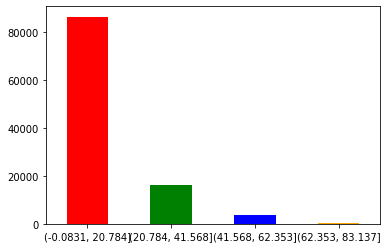

In [49]:
counts = gas_prices_brazil_df['preco_medio_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### coef_variacao_distribuicao_dist

In [50]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_distribuicao'],10)


In [51]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'].value_counts()

(-0.00078, 0.078]    88620
(0.078, 0.156]       15590
(0.156, 0.234]        2249
(0.234, 0.312]         245
(0.312, 0.39]           57
(0.39, 0.468]           37
(0.468, 0.546]          12
(0.546, 0.624]          11
(0.702, 0.78]            1
(0.624, 0.702]           1
Name: coef_variacao_distribuicao_dist, dtype: int64

In [52]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_distribuicao'],4)

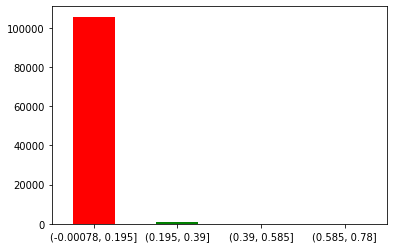

In [53]:
counts = gas_prices_brazil_df['coef_variacao_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### desvio_padrao_distribuicao_dist

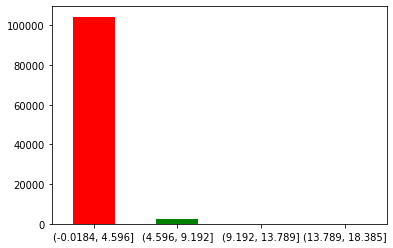

In [54]:
gas_prices_brazil_df['desvio_padrao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['desvio_padrao_distribuicao'],10)

gas_prices_brazil_df['desvio_padrao_distribuicao_dist'].value_counts()

gas_prices_brazil_df['desvio_padrao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['desvio_padrao_distribuicao'],4)


counts = gas_prices_brazil_df['desvio_padrao_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_minimo_distribuicao_dist

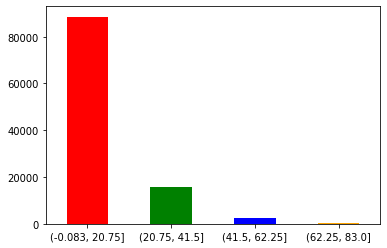

In [55]:
gas_prices_brazil_df['preco_minimo_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_minimo_distribuicao'],10)
gas_prices_brazil_df['preco_minimo_distribuicao_dist'].value_counts()

gas_prices_brazil_df['preco_minimo_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_minimo_distribuicao'],4)


counts = gas_prices_brazil_df['preco_minimo_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_maximo_distribuicao_dist

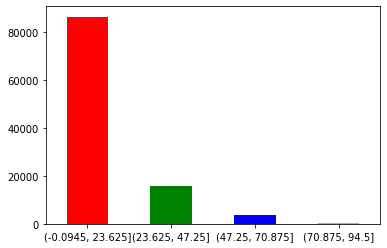

In [56]:
gas_prices_brazil_df['preco_maximo_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_maximo_distribuicao'],10)
gas_prices_brazil_df['preco_maximo_distribuicao_dist'].value_counts()

gas_prices_brazil_df['preco_maximo_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_maximo_distribuicao'],4)


counts = gas_prices_brazil_df['preco_maximo_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

## Export Format Dataset

In [57]:
gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,regiao_code,estado_code,produto_code,numero_posto_pesquisado_norm,preco_medio_revenda_norm,coef_variacao_revenda_norm,desvio_padrao_revenda_norm,preco_minimo_revenda_norm,preco_maximo_revenda_norm,margem_media_revenda_norm,preco_medio_distribuicao_norm,coef_variacao_distribuicao_norm,desvio_padrao_distribuicao_norm,preco_minimo_distribuicao_norm,preco_maximo_distribuicao_norm,preco_medio_revenda_dist,coef_variacao_revenda_dist,desvio_padrao_revenda_dist,preco_minimo_revenda_dist,preco_maximo_revenda_dist,margem_media_revenda_dist,preco_medio_distribuicao_dist,coef_variacao_distribuicao_dist,desvio_padrao_distribuicao_dist,preco_minimo_distribuicao_dist,preco_maximo_distribuicao_dist
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.110,0.4201,0.96660,R$/l,0,6,0,0.030245,0.005295,0.030380,0.001489,0.006711,0.002950,0.012565,0.009923,0.170513,0.170513,0.005061,0.010229,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05000,R$/l,0,8,0,0.092655,0.004017,0.248101,0.010607,0.003355,0.003781,0.010829,0.009178,0.147436,0.147436,0.006040,0.011111,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.970,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.16100,R$/l,0,10,0,0.045847,0.006319,0.177215,0.009025,0.006599,0.006395,0.011371,0.011667,0.125641,0.125641,0.006764,0.012286,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.830,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l,0,11,0,0.038646,0.005031,0.139241,0.006513,0.005592,0.004286,0.011724,0.009984,0.183333,0.183333,0.007218,0.012936,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.240,0.077,0.7441,1.03170,R$/l,1,1,0,0.024484,0.004209,0.167089,0.007257,0.005145,0.003370,0.006513,0.011319,0.105128,0.105128,0.008965,0.010917,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"


In [58]:
len(gas_prices_brazil_df.columns)

46

In [59]:
gas_prices_brazil_df.to_csv('norm_dist_gas_prices_brazil.csv')

### Info Dataframe

In [60]:
gas_prices_brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   regiao                           106823 non-null  category
 1   estado                           106823 non-null  category
 2   produto                          106823 non-null  category
 3   numero_posto_pesquisado          106823 non-null  int64   
 4   preco_medio_revenda              106823 non-null  float64 
 5   coef_variacao_revenda            106823 non-null  float64 
 6   preco_medio_distribuicao         106823 non-null  float64 
 7   coef_variacao_distribuicao       106823 non-null  float64 
 8   data_inicial                     106823 non-null  object  
 9   data_final                       106823 non-null  object  
 10  mes                              106823 non-null  int64   
 11  ano                              106823 non-null  in

### Visualize the fifth intances

In [61]:
gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,regiao_code,estado_code,produto_code,numero_posto_pesquisado_norm,preco_medio_revenda_norm,coef_variacao_revenda_norm,desvio_padrao_revenda_norm,preco_minimo_revenda_norm,preco_maximo_revenda_norm,margem_media_revenda_norm,preco_medio_distribuicao_norm,coef_variacao_distribuicao_norm,desvio_padrao_distribuicao_norm,preco_minimo_distribuicao_norm,preco_maximo_distribuicao_norm,preco_medio_revenda_dist,coef_variacao_revenda_dist,desvio_padrao_revenda_dist,preco_minimo_revenda_dist,preco_maximo_revenda_dist,margem_media_revenda_dist,preco_medio_distribuicao_dist,coef_variacao_distribuicao_dist,desvio_padrao_distribuicao_dist,preco_minimo_distribuicao_dist,preco_maximo_distribuicao_dist
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.110,0.4201,0.96660,R$/l,0,6,0,0.030245,0.005295,0.030380,0.001489,0.006711,0.002950,0.012565,0.009923,0.170513,0.170513,0.005061,0.010229,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05000,R$/l,0,8,0,0.092655,0.004017,0.248101,0.010607,0.003355,0.003781,0.010829,0.009178,0.147436,0.147436,0.006040,0.011111,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.970,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.16100,R$/l,0,10,0,0.045847,0.006319,0.177215,0.009025,0.006599,0.006395,0.011371,0.011667,0.125641,0.125641,0.006764,0.012286,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.830,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l,0,11,0,0.038646,0.005031,0.139241,0.006513,0.005592,0.004286,0.011724,0.009984,0.183333,0.183333,0.007218,0.012936,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.240,0.077,0.7441,1.03170,R$/l,1,1,0,0.024484,0.004209,0.167089,0.007257,0.005145,0.003370,0.006513,0.011319,0.105128,0.105128,0.008965,0.010917,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"


### Describe statiscal 

In [62]:
gas_prices_brazil_df.describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,regiao_code,estado_code,produto_code,numero_posto_pesquisado_norm,preco_medio_revenda_norm,coef_variacao_revenda_norm,desvio_padrao_revenda_norm,preco_minimo_revenda_norm,preco_maximo_revenda_norm,margem_media_revenda_norm,preco_medio_distribuicao_norm,coef_variacao_distribuicao_norm,desvio_padrao_distribuicao_norm,preco_minimo_distribuicao_norm,preco_maximo_distribuicao_norm
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.045418,8.285580,0.045152,6.484006,2011.802271,0.657227,9.416038,12.537731,2.153682,0.541599,7.177677,9.491878,1.764770,13.086985,2.181262,0.055874,0.102492,0.114982,0.061149,0.098714,0.096963,0.058449,0.099662,0.057887,0.057887,0.086478,0.100443
std,403.282519,17.752533,0.025066,13.469061,0.042258,3.443391,4.391530,1.349169,15.092193,20.841497,4.322093,1.240934,11.566862,15.771757,1.227006,7.728419,1.624546,0.096803,0.180062,0.063459,0.125527,0.168798,0.175137,0.117298,0.162010,0.054177,0.054177,0.139360,0.166897
min,1.000000,0.766000,0.000000,0.000000,0.000000,1.000000,2004.000000,0.000000,0.590000,0.999000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,2.072000,0.029000,1.745000,0.020000,4.000000,2008.000000,0.072000,1.900000,2.310000,0.271000,0.045000,1.628000,1.894500,1.000000,6.000000,1.000000,0.009842,0.013247,0.073418,0.006699,0.014652,0.011017,0.007355,0.020989,0.025641,0.025641,0.019614,0.020048
50%,104.000000,2.718000,0.041000,2.303000,0.030000,6.000000,2012.000000,0.114000,2.510000,2.999000,0.376000,0.074000,2.190000,2.474200,2.000000,13.000000,2.000000,0.024724,0.019799,0.103797,0.010607,0.021474,0.016807,0.010204,0.027701,0.038462,0.038462,0.026386,0.026182
75%,243.000000,3.752000,0.058000,3.265000,0.059000,9.000000,2016.000000,0.191000,3.499000,4.150000,0.546000,0.146000,3.098050,3.469300,3.000000,20.000000,4.000000,0.058089,0.030287,0.146835,0.017771,0.032536,0.026479,0.014818,0.039273,0.075641,0.075641,0.037326,0.036712
max,4167.000000,99.357000,0.395000,83.137000,0.780000,12.000000,2019.000000,10.748000,90.000000,120.000000,36.847000,18.385000,83.000000,94.500000,4.000000,26.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Select multiple Columns

In [63]:
columns_gas_prices_brazil_df = gas_prices_brazil_df.columns.to_list()
columns_gas_prices_brazil_df

['regiao',
 'estado',
 'produto',
 'numero_posto_pesquisado',
 'preco_medio_revenda',
 'coef_variacao_revenda',
 'preco_medio_distribuicao',
 'coef_variacao_distribuicao',
 'data_inicial',
 'data_final',
 'mes',
 'ano',
 'desvio_padrao_revenda',
 'preco_minimo_revenda',
 'preco_maximo_revenda',
 'margem_media_revenda',
 'desvio_padrao_distribuicao',
 'preco_minimo_distribuicao',
 'preco_maximo_distribuicao',
 'unidade_de_medida',
 'regiao_code',
 'estado_code',
 'produto_code',
 'numero_posto_pesquisado_norm',
 'preco_medio_revenda_norm',
 'coef_variacao_revenda_norm',
 'desvio_padrao_revenda_norm',
 'preco_minimo_revenda_norm',
 'preco_maximo_revenda_norm',
 'margem_media_revenda_norm',
 'preco_medio_distribuicao_norm',
 'coef_variacao_distribuicao_norm',
 'desvio_padrao_distribuicao_norm',
 'preco_minimo_distribuicao_norm',
 'preco_maximo_distribuicao_norm',
 'preco_medio_revenda_dist',
 'coef_variacao_revenda_dist',
 'desvio_padrao_revenda_dist',
 'preco_minimo_revenda_dist',
 'prec

In [64]:
 interess_columns_gas_prices_brazil_df  = ['regiao', 'estado', 'produto','numero_posto_pesquisado', 'coef_variacao_revenda','preco_medio_revenda','coef_variacao_distribuicao', 'preco_medio_distribuicao',  'data_inicial', 'data_final','mes', 'ano' ]

In [65]:
interess_gas_prices_brazil_df = gas_prices_brazil_df[interess_columns_gas_prices_brazil_df]

interess_gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,coef_variacao_revenda,preco_medio_revenda,coef_variacao_distribuicao,preco_medio_distribuicao,data_inicial,data_final,mes,ano
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,0.012,1.288,0.133,0.825,2004-05-09,2004-05-15,5,2004
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,0.098,1.162,0.115,0.763,2004-05-09,2004-05-15,5,2004
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,0.070,1.389,0.098,0.970,2004-05-09,2004-05-15,5,2004
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,0.055,1.262,0.143,0.830,2004-05-09,2004-05-15,5,2004
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,0.066,1.181,0.082,0.941,2004-05-09,2004-05-15,5,2004


### Select the last Five line

In [66]:
interess_gas_prices_brazil_df[-6:-1]

,regiao,estado,produto,numero_posto_pesquisado,coef_variacao_revenda,preco_medio_revenda,coef_variacao_distribuicao,preco_medio_distribuicao,data_inicial,data_final,mes,ano
106817,SUDESTE,RIO DE JANEIRO,GNV,124,0.084,3.111,0.072,2.404,2019-06-23,2019-06-29,6,2019
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0.000,2.756,2019-06-23,2019-06-29,6,2019
106819,SUL,RIO GRANDE DO SUL,GNV,23,0.038,3.401,0.164,2.451,2019-06-23,2019-06-29,6,2019
106820,SUL,SANTA CATARINA,GNV,24,0.065,2.912,0.000,1.998,2019-06-23,2019-06-29,6,2019
106821,SUDESTE,SAO PAULO,GNV,52,0.076,3.020,0.070,2.374,2019-06-23,2019-06-29,6,2019


### Select loc

In [67]:
nordeste_region_filter = interess_gas_prices_brazil_df['regiao'] == "NORDESTE"
nordeste_region_filter

0         False
1         False
2         False
3         False
4          True
          ...  
106818     True
106819    False
106820    False
106821    False
106822     True
Name: regiao, Length: 106823, dtype: bool

In [68]:
nordeste_region_filter = interess_gas_prices_brazil_df['regiao'] == "NORDESTE"
pernambuco_estado_filter = interess_gas_prices_brazil_df['estado'] == "PERNAMBUCO"
ano_filter = interess_gas_prices_brazil_df['ano'] == 2019



### Select nordest region_filter

In [69]:
interess_gas_prices_brazil_df.loc[nordeste_region_filter,interess_columns_gas_prices_brazil_df]


,regiao,estado,produto,numero_posto_pesquisado,coef_variacao_revenda,preco_medio_revenda,coef_variacao_distribuicao,preco_medio_distribuicao,data_inicial,data_final,mes,ano
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,0.066,1.181,0.082,0.941,2004-05-09,2004-05-15,5,2004
5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,0.095,1.383,0.134,0.957,2004-05-09,2004-05-15,5,2004
6,NORDESTE,CEARA,ETANOL HIDRATADO,278,0.150,1.453,0.062,1.100,2004-05-09,2004-05-15,5,2004
7,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,0.097,1.631,0.082,1.116,2004-05-09,2004-05-15,5,2004
8,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,0.101,1.284,0.077,0.931,2004-05-09,2004-05-15,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
106810,NORDESTE,CEARA,GNV,16,0.009,3.656,0.000,2.780,2019-06-23,2019-06-29,6,2019
106814,NORDESTE,PARAIBA,GNV,11,0.004,3.688,0.008,3.068,2019-06-23,2019-06-29,6,2019
106816,NORDESTE,PERNAMBUCO,GNV,12,0.096,2.698,0.103,1.907,2019-06-23,2019-06-29,6,2019
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0.000,2.756,2019-06-23,2019-06-29,6,2019


### Select Pernambuco state filter

In [70]:
interess_gas_prices_brazil_df.loc[pernambuco_estado_filter,interess_columns_gas_prices_brazil_df]


,regiao,estado,produto,numero_posto_pesquisado,coef_variacao_revenda,preco_medio_revenda,coef_variacao_distribuicao,preco_medio_distribuicao,data_inicial,data_final,mes,ano
9,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,0.115,1.224,0.096,0.947,2004-05-09,2004-05-15,5,2004
36,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,435,0.113,1.217,0.084,0.931,2004-05-16,2004-05-22,5,2004
63,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,421,0.112,1.217,0.084,0.946,2004-05-23,2004-05-29,5,2004
90,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,425,0.108,1.216,0.078,0.963,2004-05-30,2004-06-05,5,2004
117,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,415,0.096,1.235,0.086,0.972,2004-06-06,2004-06-12,6,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
106716,NORDESTE,PERNAMBUCO,ÓLEO DIESEL,8,0.036,3.681,0.038,3.276,2019-06-23,2019-06-29,6,2019
106743,NORDESTE,PERNAMBUCO,ÓLEO DIESEL S10,174,0.040,3.556,0.032,3.106,2019-06-23,2019-06-29,6,2019
106770,NORDESTE,PERNAMBUCO,GASOLINA COMUM,192,0.042,4.445,0.018,3.945,2019-06-23,2019-06-29,6,2019
106797,NORDESTE,PERNAMBUCO,GLP,165,0.055,66.735,0.060,53.498,2019-06-23,2019-06-29,6,2019


### Select 2019 Year Filter

In [71]:
interess_gas_prices_brazil_df.loc[ano_filter,interess_columns_gas_prices_brazil_df]


,regiao,estado,produto,numero_posto_pesquisado,coef_variacao_revenda,preco_medio_revenda,coef_variacao_distribuicao,preco_medio_distribuicao,data_inicial,data_final,mes,ano
103069,NORTE,ACRE,ETANOL HIDRATADO,18,0.070,4.032,0.032,3.455,2019-01-06,2019-01-12,1,2019
103070,NORDESTE,ALAGOAS,ETANOL HIDRATADO,57,0.063,3.242,0.084,2.790,2019-01-06,2019-01-12,1,2019
103071,NORTE,AMAZONAS,ETANOL HIDRATADO,44,0.042,3.531,0.022,3.243,2019-01-06,2019-01-12,1,2019
103072,NORDESTE,BAHIA,ETANOL HIDRATADO,328,0.051,3.410,0.043,2.782,2019-01-06,2019-01-12,1,2019
103073,NORDESTE,CEARA,ETANOL HIDRATADO,196,0.033,3.493,0.024,3.073,2019-01-06,2019-01-12,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0.000,2.756,2019-06-23,2019-06-29,6,2019
106819,SUL,RIO GRANDE DO SUL,GNV,23,0.038,3.401,0.164,2.451,2019-06-23,2019-06-29,6,2019
106820,SUL,SANTA CATARINA,GNV,24,0.065,2.912,0.000,1.998,2019-06-23,2019-06-29,6,2019
106821,SUDESTE,SAO PAULO,GNV,52,0.076,3.020,0.070,2.374,2019-06-23,2019-06-29,6,2019


### Check Unique Values

### Estado

In [72]:
interess_gas_prices_brazil_df.estado.unique()

['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'ALAGOAS', ..., 'RIO DE JANEIRO', 'SAO PAULO', 'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA']
Length: 27
Categories (27, object): ['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL', ...,
                          'SAO PAULO', 'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA']

In [73]:
len(interess_gas_prices_brazil_df.estado.unique())

27

### Region

In [74]:
len(interess_gas_prices_brazil_df.regiao.unique())

5

In [75]:
interess_gas_prices_brazil_df.regiao.unique()

['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']
Categories (5, object): ['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']

### Product

In [76]:
len(interess_gas_prices_brazil_df.produto.unique())

6

In [77]:
interess_gas_prices_brazil_df.produto.unique()

['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL', 'ÓLEO DIESEL S10']
Categories (6, object): ['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
                         'ÓLEO DIESEL S10']

### By Year

In [78]:
len(interess_gas_prices_brazil_df.ano.unique())

16

In [79]:
interess_gas_prices_brazil_df.ano.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

## Select Mean General


In [80]:
TAM = len(interess_gas_prices_brazil_df)

### Número de Postos Pesquisados Column

In [81]:
interess_gas_prices_brazil_df['numero_posto_pesquisado'].sum()/TAM

233.77097628787809

### Coef de Variação Revenda Column

In [82]:
interess_gas_prices_brazil_df['coef_variacao_revenda'].sum()/TAM

0.045417793920784856

### Preço Media Revenda Column

In [83]:
interess_gas_prices_brazil_df['preco_medio_revenda'].sum()/TAM

10.870780431180549

Coef de Variação Distribuição Column

In [84]:
interess_gas_prices_brazil_df['coef_variacao_distribuicao'].dtype

dtype('float64')

In [85]:
interess_gas_prices_brazil_df['coef_variacao_distribuicao'] = interess_gas_prices_brazil_df['coef_variacao_distribuicao'].apply(lambda x : 0 if x == '-' else x)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
interess_gas_prices_brazil_df['coef_variacao_distribuicao'] = pd.to_numeric(interess_gas_prices_brazil_df['coef_variacao_distribuicao'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
interess_gas_prices_brazil_df['coef_variacao_distribuicao'].dtype

dtype('float32')

In [88]:
interess_gas_prices_brazil_df['coef_variacao_distribuicao'].sum()/TAM

0.04515205826753134

PREÇO MÉDIO DISTRIBUIÇÃO

In [89]:
interess_gas_prices_brazil_df['preco_medio_distribuicao'] = interess_gas_prices_brazil_df['preco_medio_distribuicao'].apply(lambda x : 0 if x == '-' else x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
interess_gas_prices_brazil_df['preco_medio_distribuicao'] = pd.to_numeric(interess_gas_prices_brazil_df['preco_medio_distribuicao'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
interess_gas_prices_brazil_df['preco_medio_distribuicao'].dtype

dtype('float32')

In [92]:
interess_gas_prices_brazil_df['preco_medio_distribuicao'].sum()/TAM

8.285580469561799

In [93]:
interess_gas_prices_brazil_df['preco_medio_distribuicao'].mean()

8.285548210144043

## Select Mean by Region

In [94]:
interess_gas_prices_brazil_df.columns

Index(['regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'coef_variacao_revenda', 'preco_medio_revenda',
       'coef_variacao_distribuicao', 'preco_medio_distribuicao',
       'data_inicial', 'data_final', 'mes', 'ano'],
      dtype='object')

In [95]:

coef_med_columns = ['numero_posto_pesquisado', 'coef_variacao_distribuicao','preco_medio_distribuicao','coef_variacao_revenda', 'preco_medio_revenda']

### Nordeste

In [96]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['regiao'] == 'NORDESTE') & (interess_gas_prices_brazil_df['ano'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
numero_posto_pesquisado,86.675115
coef_variacao_distribuicao,0.034823
preco_medio_distribuicao,11.689772
coef_variacao_revenda,0.040197
preco_medio_revenda,14.858909


### Norte

In [97]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['regiao'] == 'NORTE') & (interess_gas_prices_brazil_df['ano'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
numero_posto_pesquisado,45.138603
coef_variacao_distribuicao,0.036363
preco_medio_distribuicao,15.483941
coef_variacao_revenda,0.049937
preco_medio_revenda,18.927386


### Centro-Oeste Region

In [98]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (interess_gas_prices_brazil_df['ano'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
numero_posto_pesquisado,105.888679
coef_variacao_distribuicao,0.045958
preco_medio_distribuicao,13.791260
coef_variacao_revenda,0.048194
preco_medio_revenda,17.811030


### Sudeste Region

In [99]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['regiao'] == 'SUDESTE') & (interess_gas_prices_brazil_df['ano'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
numero_posto_pesquisado,464.586667
coef_variacao_distribuicao,0.042948
preco_medio_distribuicao,10.787279
coef_variacao_revenda,0.054463
preco_medio_revenda,14.125663


### Sul Region

In [100]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['regiao'] == 'SUL') & (interess_gas_prices_brazil_df['ano'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
numero_posto_pesquisado,221.485523
coef_variacao_distribuicao,0.048385
preco_medio_distribuicao,11.039557
coef_variacao_revenda,0.049693
preco_medio_revenda,14.632864


---



---
# 4 Limpeza de Dados (Univariado e Bivariado)
---



---

# 4.1 Estatistica Univariada


## Import dependencies


In [101]:
import pandas as pd
import numpy as np

### Read the Dataset

In [102]:
#gas_prices_brazil_df = pd.read_csv('https://drive.google.com/uc?id=1CgI-6f3l6i0vX_35tjQPOu7ltpbnIYiE')
gas_prices_brazil_df = pd.read_csv('https://drive.google.com/uc?id=1JPteFsXb2cq5ObAW6ZWHMe9OU7BT2i_l')


In [103]:
gas_prices_brazil_df.head()

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,regiao_code,estado_code,produto_code,numero_posto_pesquisado_norm,preco_medio_revenda_norm,coef_variacao_revenda_norm,desvio_padrao_revenda_norm,preco_minimo_revenda_norm,preco_maximo_revenda_norm,margem_media_revenda_norm,preco_medio_distribuicao_norm,coef_variacao_distribuicao_norm,desvio_padrao_distribuicao_norm,preco_minimo_distribuicao_norm,preco_maximo_distribuicao_norm,preco_medio_revenda_dist,coef_variacao_revenda_dist,desvio_padrao_revenda_dist,preco_minimo_revenda_dist,preco_maximo_revenda_dist,margem_media_revenda_dist,preco_medio_distribuicao_dist,coef_variacao_distribuicao_dist,desvio_padrao_distribuicao_dist,preco_minimo_distribuicao_dist,preco_maximo_distribuicao_dist
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.110,0.4201,0.96660,R$/l,0,6,0,0.030245,0.005295,0.030380,0.001489,0.006711,0.002950,0.012565,0.009923,0.170513,0.170513,0.005061,0.010229,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
1,1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05000,R$/l,0,8,0,0.092655,0.004017,0.248101,0.010607,0.003355,0.003781,0.010829,0.009178,0.147436,0.147436,0.006040,0.011111,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.970,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.16100,R$/l,0,10,0,0.045847,0.006319,0.177215,0.009025,0.006599,0.006395,0.011371,0.011667,0.125641,0.125641,0.006764,0.012286,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.830,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l,0,11,0,0.038646,0.005031,0.139241,0.006513,0.005592,0.004286,0.011724,0.009984,0.183333,0.183333,0.007218,0.012936,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.240,0.077,0.7441,1.03170,R$/l,1,1,0,0.024484,0.004209,0.167089,0.007257,0.005145,0.003370,0.006513,0.011319,0.105128,0.105128,0.008965,0.010917,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"


### Drop Column 

In [104]:
gas_prices_brazil_df = gas_prices_brazil_df.drop(['Unnamed: 0'], axis=1)

In [105]:
gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,regiao_code,estado_code,produto_code,numero_posto_pesquisado_norm,preco_medio_revenda_norm,coef_variacao_revenda_norm,desvio_padrao_revenda_norm,preco_minimo_revenda_norm,preco_maximo_revenda_norm,margem_media_revenda_norm,preco_medio_distribuicao_norm,coef_variacao_distribuicao_norm,desvio_padrao_distribuicao_norm,preco_minimo_distribuicao_norm,preco_maximo_distribuicao_norm,preco_medio_revenda_dist,coef_variacao_revenda_dist,desvio_padrao_revenda_dist,preco_minimo_revenda_dist,preco_maximo_revenda_dist,margem_media_revenda_dist,preco_medio_distribuicao_dist,coef_variacao_distribuicao_dist,desvio_padrao_distribuicao_dist,preco_minimo_distribuicao_dist,preco_maximo_distribuicao_dist
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.110,0.4201,0.96660,R$/l,0,6,0,0.030245,0.005295,0.030380,0.001489,0.006711,0.002950,0.012565,0.009923,0.170513,0.170513,0.005061,0.010229,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05000,R$/l,0,8,0,0.092655,0.004017,0.248101,0.010607,0.003355,0.003781,0.010829,0.009178,0.147436,0.147436,0.006040,0.011111,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.970,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.16100,R$/l,0,10,0,0.045847,0.006319,0.177215,0.009025,0.006599,0.006395,0.011371,0.011667,0.125641,0.125641,0.006764,0.012286,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.830,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l,0,11,0,0.038646,0.005031,0.139241,0.006513,0.005592,0.004286,0.011724,0.009984,0.183333,0.183333,0.007218,0.012936,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.240,0.077,0.7441,1.03170,R$/l,1,1,0,0.024484,0.004209,0.167089,0.007257,0.005145,0.003370,0.006513,0.011319,0.105128,0.105128,0.008965,0.010917,"(0.667, 25.414]","(-0.000395, 0.0988]","(-0.0107, 2.687]","(0.501, 22.942]","(0.88, 30.749]","(-0.0368, 9.212]","(-0.0831, 20.784]","(-0.00078, 0.195]","(-0.0184, 4.596]","(-0.083, 20.75]","(-0.0945, 23.625]"


In [106]:
gas_prices_brazil_df.dtypes

regiao                              object
estado                              object
produto                             object
numero_posto_pesquisado              int64
preco_medio_revenda                float64
coef_variacao_revenda              float64
preco_medio_distribuicao           float64
coef_variacao_distribuicao         float64
data_inicial                        object
data_final                          object
mes                                  int64
ano                                  int64
desvio_padrao_revenda              float64
preco_minimo_revenda               float64
preco_maximo_revenda               float64
margem_media_revenda               float64
desvio_padrao_distribuicao         float64
preco_minimo_distribuicao          float64
preco_maximo_distribuicao          float64
unidade_de_medida                   object
regiao_code                          int64
estado_code                          int64
produto_code                         int64
numero_post

## Estatística Descritiva

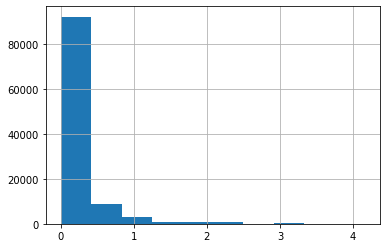

In [107]:
(gas_prices_brazil_df['numero_posto_pesquisado']/1000).hist()

### Apply log function

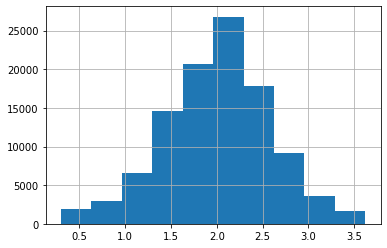

In [108]:
gas_prices_brazil_df['numero_posto_pesquisado_log'] = gas_prices_brazil_df['numero_posto_pesquisado'].apply(np.log10)
gas_prices_brazil_df[gas_prices_brazil_df['numero_posto_pesquisado_log'] > 0]['numero_posto_pesquisado_log'].hist()


## Univariate Statiscal


### numero_posto_pesquisado

In [109]:
gas_prices_brazil_df['numero_posto_pesquisado'].mean()

233.77097628787809

In [110]:
gas_prices_brazil_df['numero_posto_pesquisado'].max()

4167

In [111]:
gas_prices_brazil_df['numero_posto_pesquisado'].min()

1

In [112]:
gas_prices_brazil_df['numero_posto_pesquisado'].var()

162636.78979924344

In [113]:
gas_prices_brazil_df['numero_posto_pesquisado'].std()

403.2825185886979

In [114]:
gas_prices_brazil_df['numero_posto_pesquisado'].describe()

count    106823.000000
mean        233.770976
std         403.282519
min           1.000000
25%          42.000000
50%         104.000000
75%         243.000000
max        4167.000000
Name: numero_posto_pesquisado, dtype: float64

In [115]:
gas_prices_brazil_df['numero_posto_pesquisado'].describe()[6] -gas_prices_brazil_df['numero_posto_pesquisado'].describe()[4]

201.0

### Check the Outliers

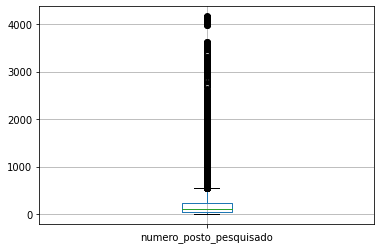

In [116]:
gas_prices_brazil_df.boxplot(column=['numero_posto_pesquisado'])


### Operation

In [117]:
#gas_prices_brazil_df['numero_posto_pesquisado'] = gas_prices_brazil_df['numero_posto_pesquisado']/lengas_prices_brazil_df['area']


In [118]:
gas_prices_brazil_df['produto']

0         ETANOL HIDRATADO
1         ETANOL HIDRATADO
2         ETANOL HIDRATADO
3         ETANOL HIDRATADO
4         ETANOL HIDRATADO
                ...       
106818                 GNV
106819                 GNV
106820                 GNV
106821                 GNV
106822                 GNV
Name: produto, Length: 106823, dtype: object

In [119]:
gas_prices_brazil_df[(gas_prices_brazil_df['produto'] == 'GNV') & (gas_prices_brazil_df.numero_posto_pesquisado > 1) & (gas_prices_brazil_df['estado'] == 'PERNAMBUCO')].mean()

numero_posto_pesquisado              26.430573
preco_medio_revenda                   1.818466
coef_variacao_revenda                 0.024799
preco_medio_distribuicao              1.223127
coef_variacao_distribuicao            0.109712
mes                                   6.500637
ano                                2011.433121
desvio_padrao_revenda                 0.050390
preco_minimo_revenda                  1.786773
preco_maximo_revenda                  1.998554
margem_media_revenda                  0.523885
desvio_padrao_distribuicao            0.127273
preco_minimo_distribuicao             1.060897
preco_maximo_distribuicao             1.386182
regiao_code                           1.000000
estado_code                          16.000000
produto_code                          3.000000
numero_posto_pesquisado_norm          0.006104
preco_medio_revenda_norm              0.010675
coef_variacao_revenda_norm            0.062782
desvio_padrao_revenda_norm            0.004688
preco_minimo_

In [120]:
gas_prices_brazil_df[(gas_prices_brazil_df['produto'] == 'ETANOL HIDRATADO') & (gas_prices_brazil_df.numero_posto_pesquisado >1) & (gas_prices_brazil_df['estado'] == 'PERNAMBUCO')].mean()

numero_posto_pesquisado             292.997449
preco_medio_revenda                   2.207764
coef_variacao_revenda                 0.066270
preco_medio_distribuicao              1.947417
coef_variacao_distribuicao            0.045283
mes                                   6.502551
ano                                2011.424745
desvio_padrao_revenda                 0.138393
preco_minimo_revenda                  1.965864
preco_maximo_revenda                  2.653765
margem_media_revenda                  0.260347
desvio_padrao_distribuicao            0.085982
preco_minimo_distribuicao             1.730490
preco_maximo_distribuicao             2.226535
regiao_code                           1.000000
estado_code                          16.000000
produto_code                          0.000000
numero_posto_pesquisado_norm          0.070091
preco_medio_revenda_norm              0.014624
coef_variacao_revenda_norm            0.167773
desvio_padrao_revenda_norm            0.012876
preco_minimo_

In [121]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].mean()


estado
ACRE                     1.000000
ALAGOAS                  8.940568
AMAPA                    1.000000
AMAZONAS                 1.296117
BAHIA                   25.737580
CEARA                   15.485350
DISTRITO FEDERAL         1.000000
ESPIRITO SANTO          10.385696
GOIAS                    1.150538
MARANHAO                 1.090909
MATO GROSSO              2.021429
MATO GROSSO DO SUL       3.947917
MINAS GERAIS            21.426564
PARA                     1.052632
PARAIBA                 14.059873
PARANA                   7.741268
PERNAMBUCO              26.430573
PIAUI                    1.000000
RIO DE JANEIRO         171.312102
RIO GRANDE DO NORTE     18.584713
RIO GRANDE DO SUL       20.985987
RONDONIA                 2.000000
SANTA CATARINA          28.228025
SAO PAULO               95.793631
SERGIPE                  9.540921
TOCANTINS                1.000000
Name: numero_posto_pesquisado, dtype: float64

In [122]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado']).agg(['mean','median', 'var','std'])


numero_posto_pesquisado         ... numero_posto_pesquisado_log          
                                       mean median  ...                         var       std
estado                                              ...                                      
ACRE                               1.000000      1  ...                    0.000000  0.000000
ALAGOAS                            8.940568      9  ...                    0.076859  0.277235
AMAPA                              1.000000      1  ...                    0.000000  0.000000
AMAZONAS                           1.296117      1  ...                    0.022601  0.150336
BAHIA                             25.737580     26  ...                    0.020024  0.141507
CEARA                             15.485350     15  ...                    0.061103  0.247189
DISTRITO FEDERAL                   1.000000      1  ...                    0.000000  0.000000
ESPIRITO SANTO                    10.385696     11  ...                    0.040306  0.200762
GOIAS                              1.150538      1  ...                    0.011651  0.107938
MARANHAO                           1.090909      1  ...                    0.007846  0.088577
MATO GROSSO                        2.021429      2  ...                    0.046164  0.214857
MATO GROSSO DO SUL                 3.947917      4  ...                    0.068677  0.262064
MINAS GERAIS                      21.426564     18  ...                    0.167494  0.409261
PARA                               1.052632      1  ...                    0.004769  0.069061
PARAIBA                           14.059873     15  ...                    0.064777  0.254513
PARANA                             7.741268      7  ...                    0.082712  0.287597
PERNAMBUCO                        26.430573     30  ...                    0.052139  0.228339
PIAUI                              1.000000      1  ...                    0.000000  0.000000
RIO DE JANEIRO                   171.312102    181  ...                    0.022982  0.151597
RIO GRANDE DO NORTE               18.584713     19  ...                    0.029216  0.170926
RIO GRANDE DO SUL                 20.985987     20  ...                    0.031866  0.178509
RONDONIA                           2.000000      2  ...                    0.058212  0.241272
SANTA CATARINA                    28.228025     28  ...                    0.037359  0.193285
SAO PAULO                         95.793631     94  ...                    0.043634  0.208889
SERGIPE                            9.540921     10  ...                    0.058901  0.242696
TOCANTINS                          1.000000      1  ...                    0.000000  0.000000

[26 rows x 120 columns]

In [123]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado']).agg(['mean','median', 'var','std'])


numero_posto_pesquisado         ... numero_posto_pesquisado_log          
                                       mean median  ...                         var       std
estado                                              ...                                      
ACRE                              30.031888     34  ...                    0.035067  0.187261
ALAGOAS                           89.259873     96  ...                    0.027732  0.166529
AMAPA                              8.206259      8  ...                    0.170495  0.412910
AMAZONAS                          66.151592     73  ...                    0.029074  0.170511
BAHIA                            388.526115    408  ...                    0.012251  0.110683
CEARA                            209.789809    203  ...                    0.007840  0.088546
DISTRITO FEDERAL                  79.770701     80  ...                    0.051626  0.227213
ESPIRITO SANTO                   164.299363    176  ...                    0.062924  0.250846
GOIAS                            264.294268    255  ...                    0.016941  0.130159
MARANHAO                          82.354140     88  ...                    0.043748  0.209161
MATO GROSSO                      151.466242    141  ...                    0.008675  0.093141
MATO GROSSO DO SUL               124.398726    131  ...                    0.019082  0.138139
MINAS GERAIS                     917.355414    975  ...                    0.030698  0.175208
PARA                              76.639490     84  ...                    0.044630  0.211259
PARAIBA                          105.233121    118  ...                    0.033893  0.184100
PARANA                           543.903185    565  ...                    0.024698  0.157157
PERNAMBUCO                       292.997449    318  ...                    0.030572  0.174849
PIAUI                             69.472611     72  ...                    0.027132  0.164718
RIO DE JANEIRO                   675.221656    716  ...                    0.028079  0.167567
RIO GRANDE DO NORTE              100.183439    110  ...                    0.027525  0.165907
RIO GRANDE DO SUL                476.184713    547  ...                    0.057459  0.239706
RONDONIA                          72.924841     85  ...                    0.053151  0.230545
RORAIMA                           11.615681     13  ...                    0.124420  0.352732
SANTA CATARINA                   343.872449    374  ...                    0.036792  0.191813
SAO PAULO                       2394.276433   2380  ...                    0.023926  0.154679
SERGIPE                           47.073885     49  ...                    0.025447  0.159520
TOCANTINS                         52.854592     58  ...                    0.015380  0.124018

[27 rows x 120 columns]

In [124]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao']).agg(['mean','median', 'var','std'])


numero_posto_pesquisado         ... numero_posto_pesquisado_log          
                                mean median  ...                         var       std
regiao                                       ...                                      
CENTRO OESTE                2.880499      2  ...                    0.083973  0.289781
NORDESTE                   16.719462     15  ...                    0.106474  0.326303
NORTE                       1.275711      1  ...                    0.021510  0.146664
SUDESTE                    74.804528     47  ...                    0.331143  0.575450
SUL                        19.042680     17  ...                    0.118338  0.344002

[5 rows x 120 columns]

In [125]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao']).agg(['mean','median', 'var','std'])


numero_posto_pesquisado         ... numero_posto_pesquisado_log          
                                mean median  ...                         var       std
regiao                                       ...                                      
CENTRO OESTE              154.982484  140.0  ...                    0.064230  0.253437
NORDESTE                  153.857022  109.0  ...                    0.111724  0.334252
NORTE                      46.100296   39.0  ...                    0.227600  0.477074
SUDESTE                  1037.788217  729.0  ...                    0.221824  0.470982
SUL                       454.700510  500.5  ...                    0.047238  0.217343

[5 rows x 120 columns]

## Produto Group by Estado

### Agg media


In [126]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

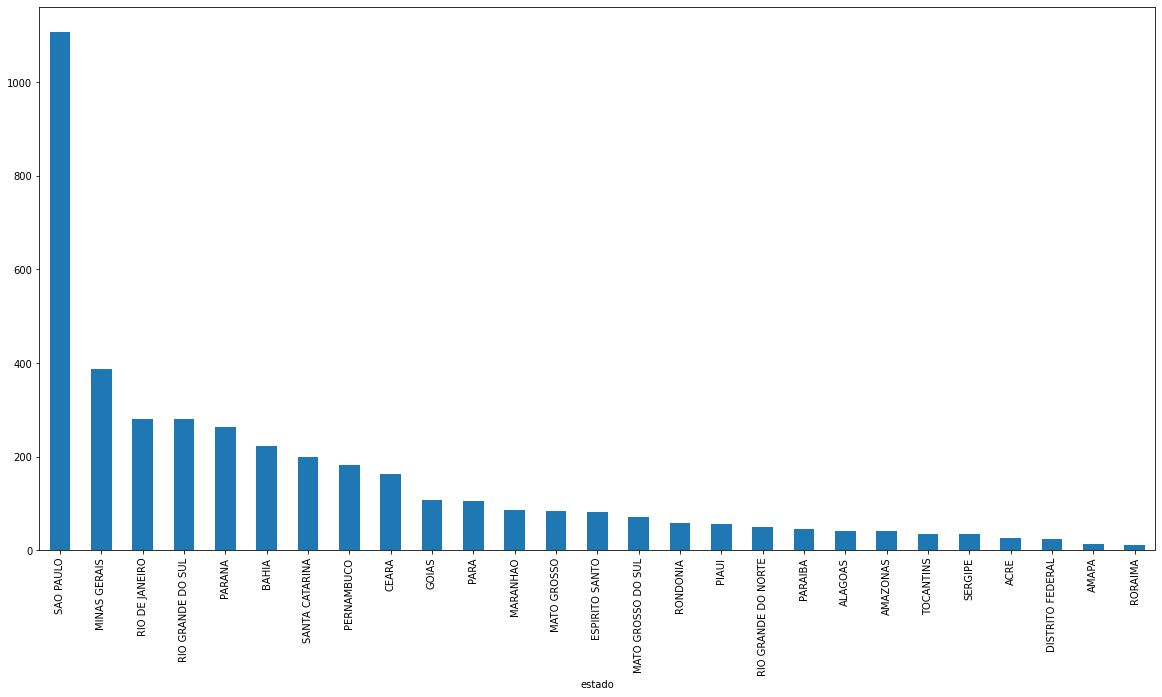

In [127]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

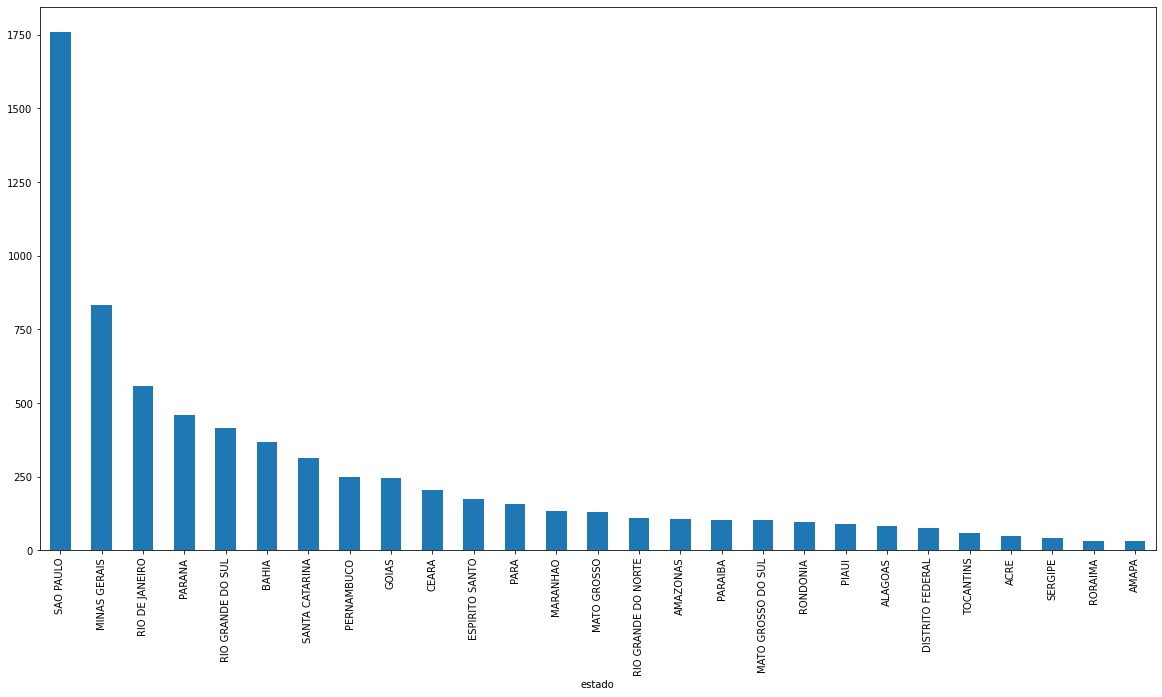

In [128]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

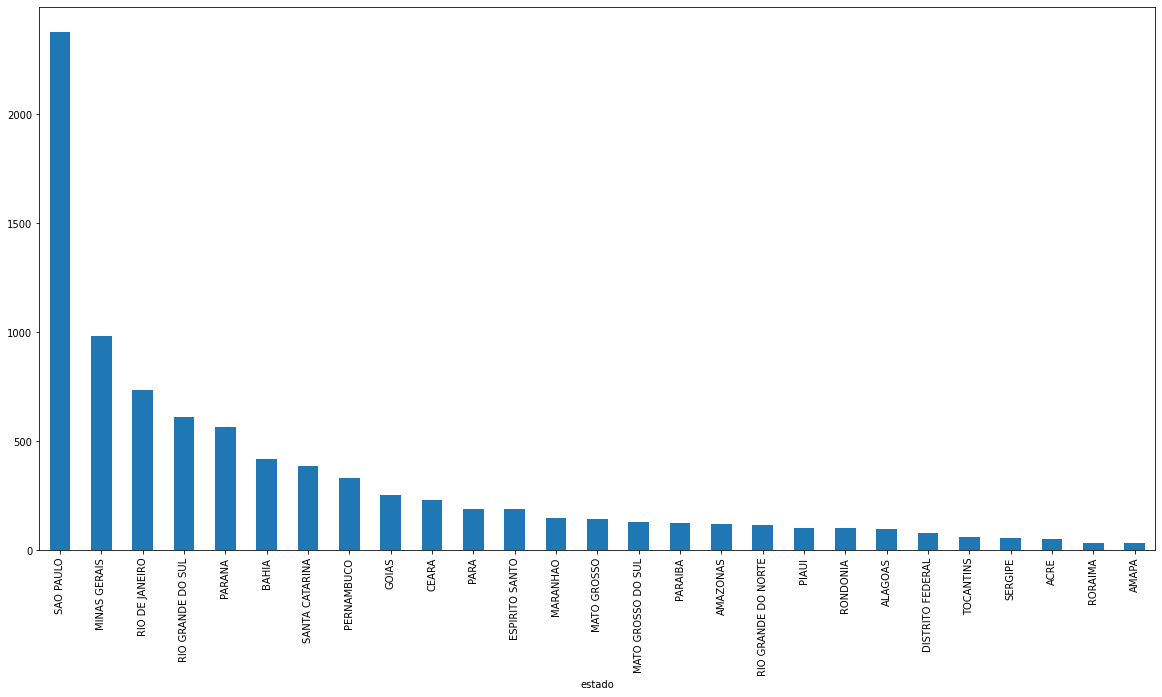

In [129]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

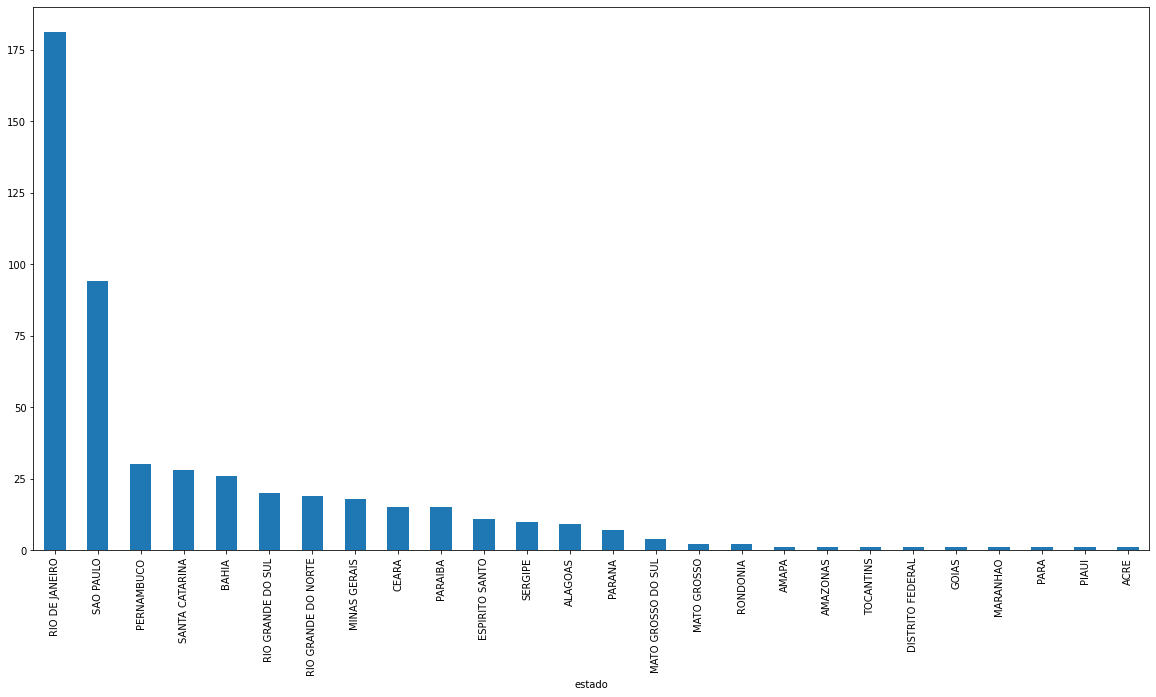

In [130]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

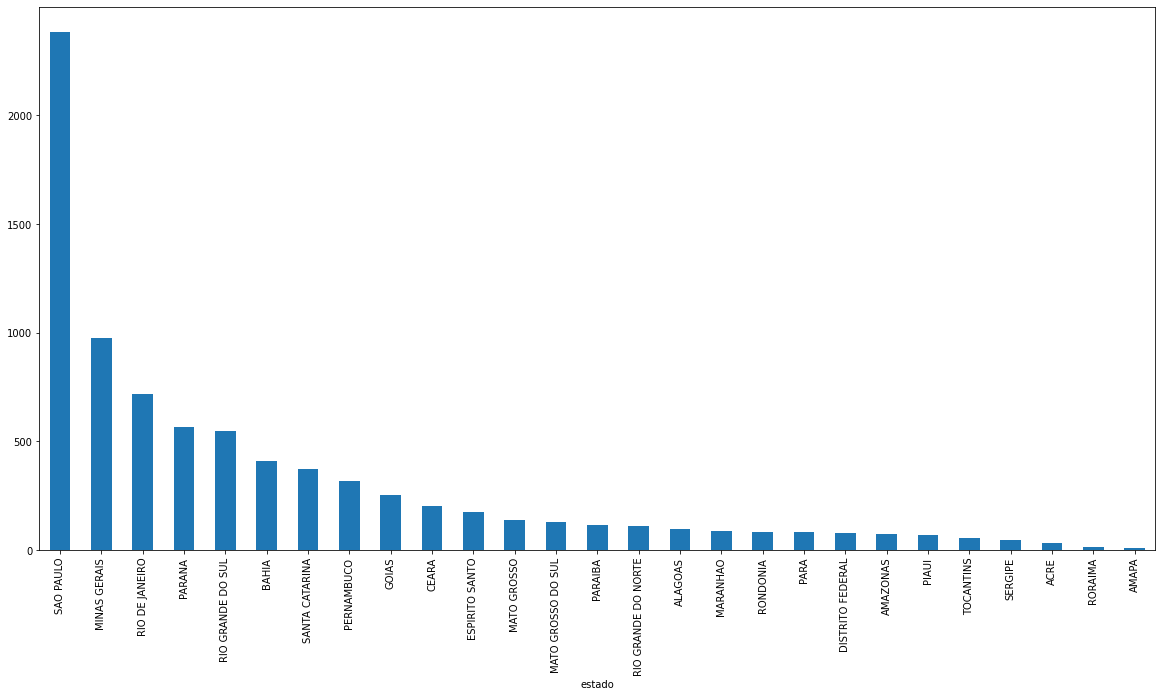

In [131]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg var


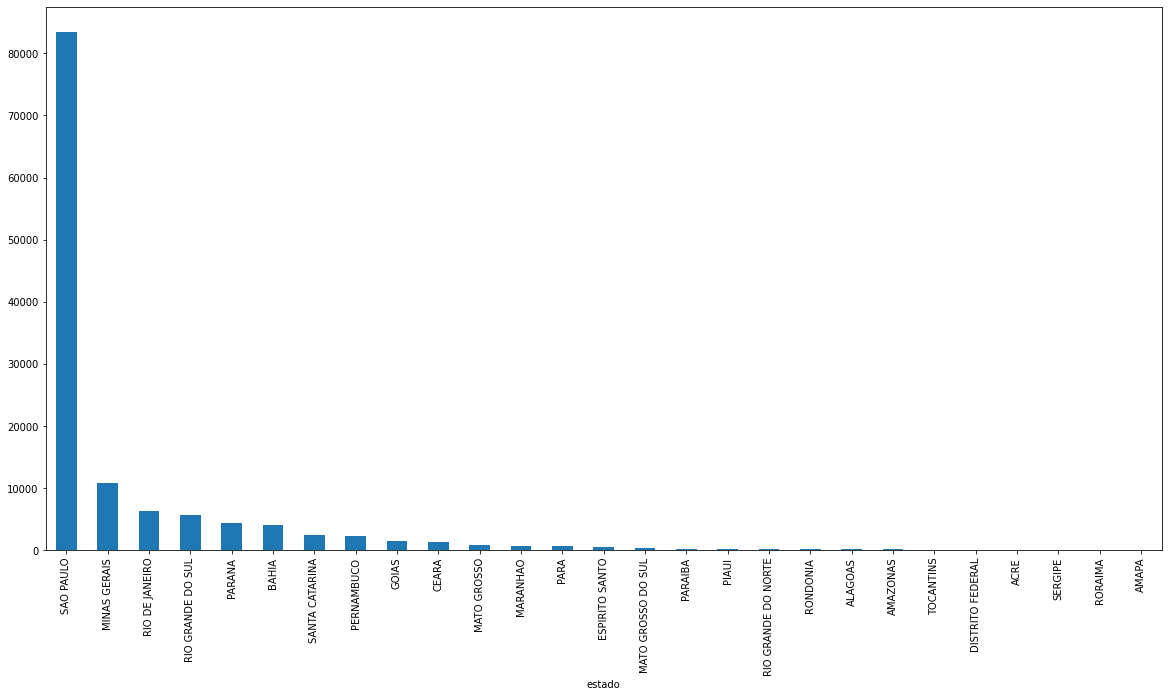

In [132]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

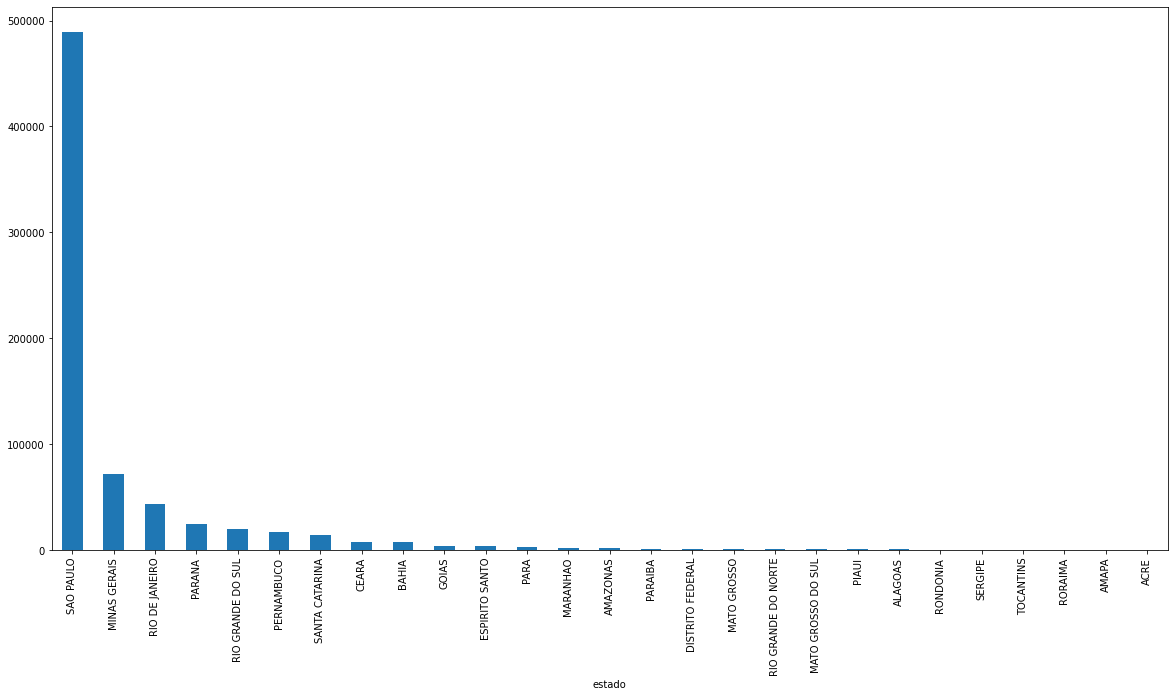

In [133]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

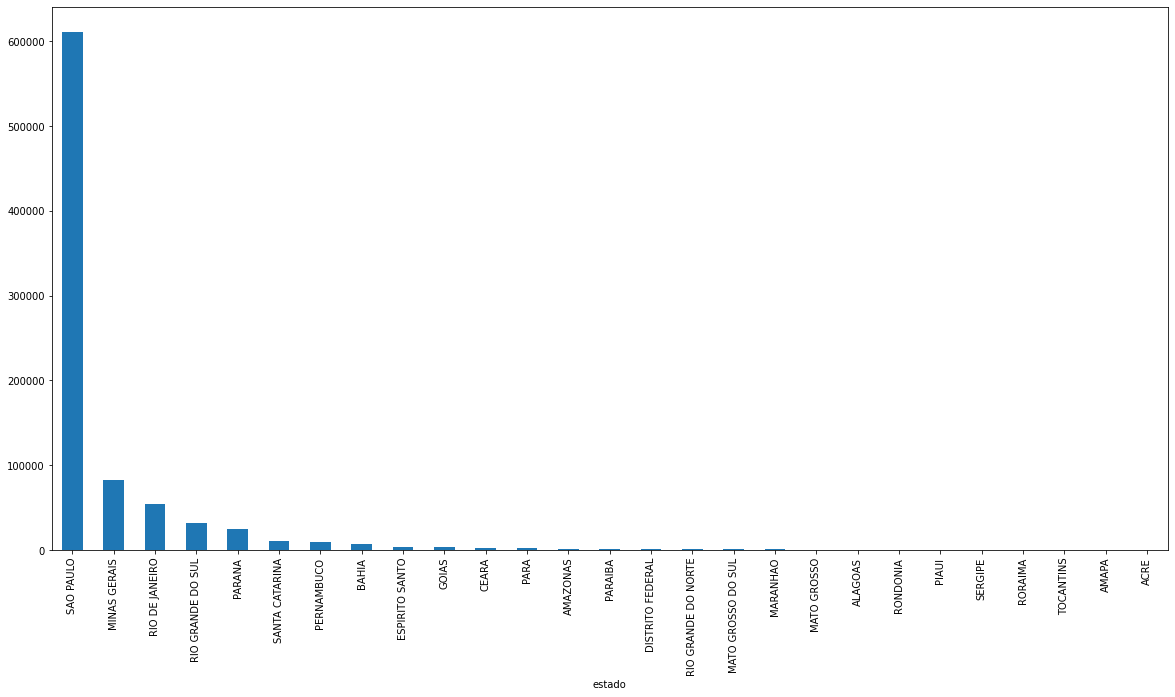

In [134]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

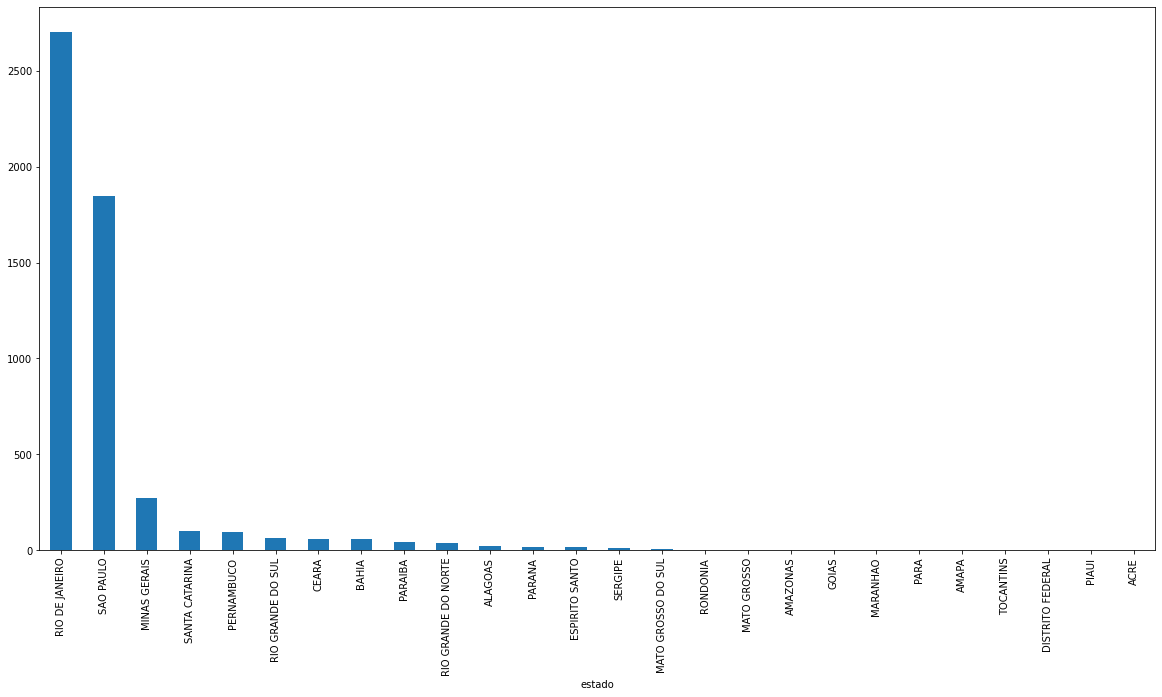

In [135]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

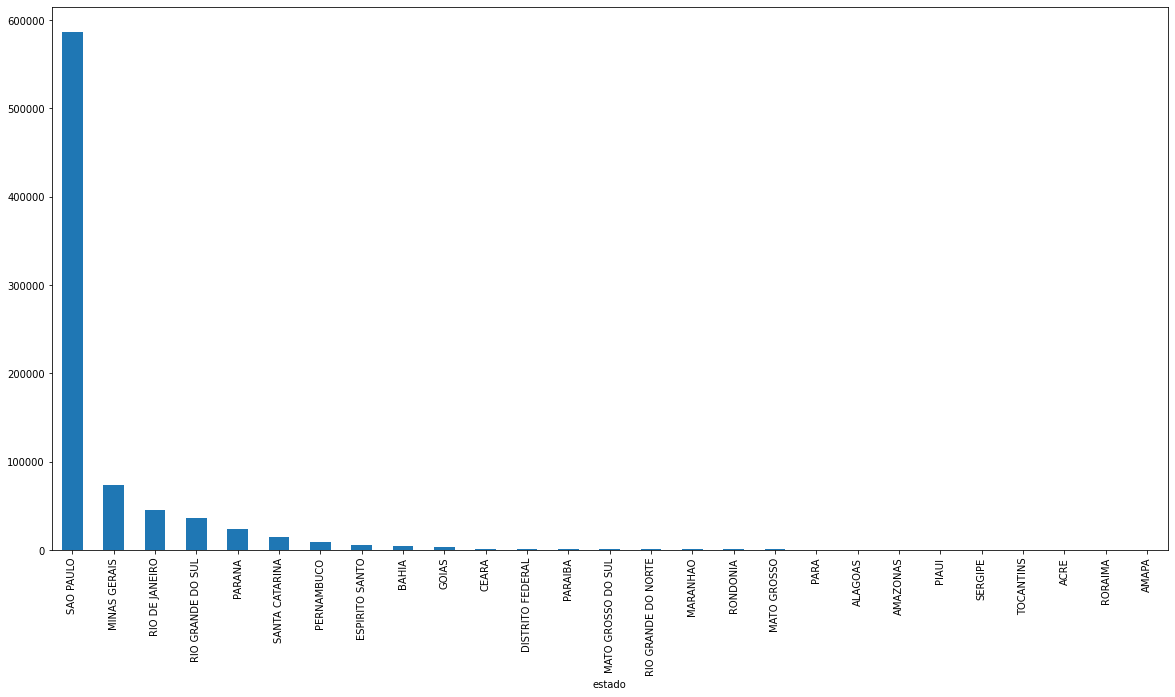

In [136]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg std


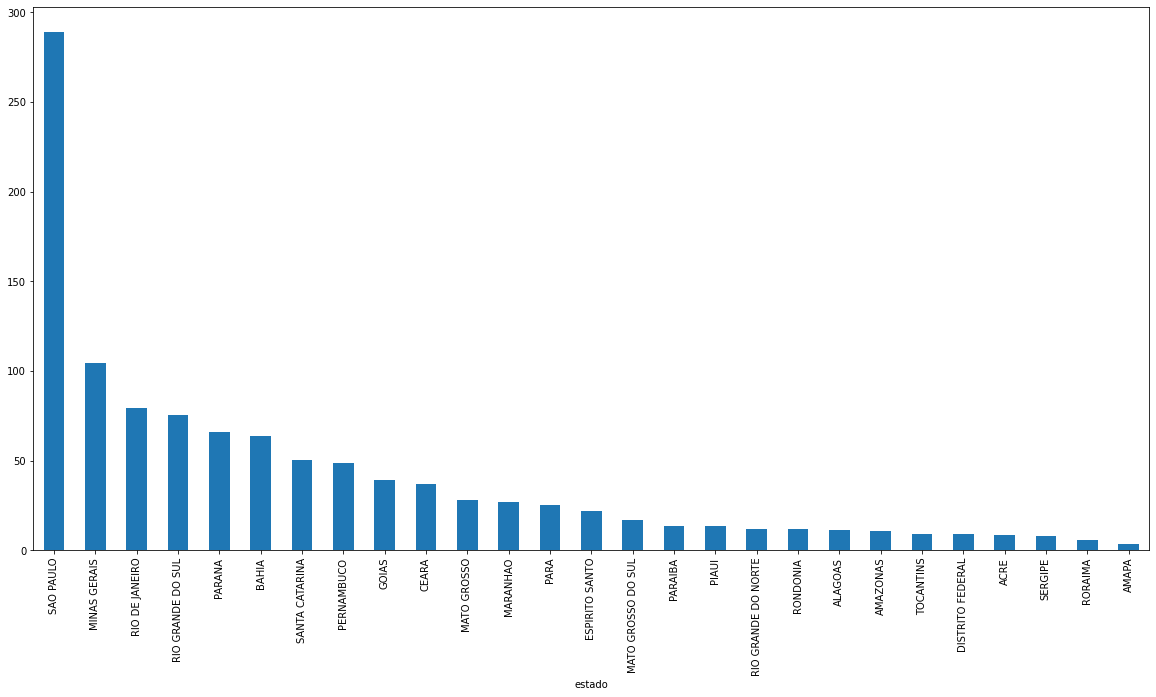

In [137]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

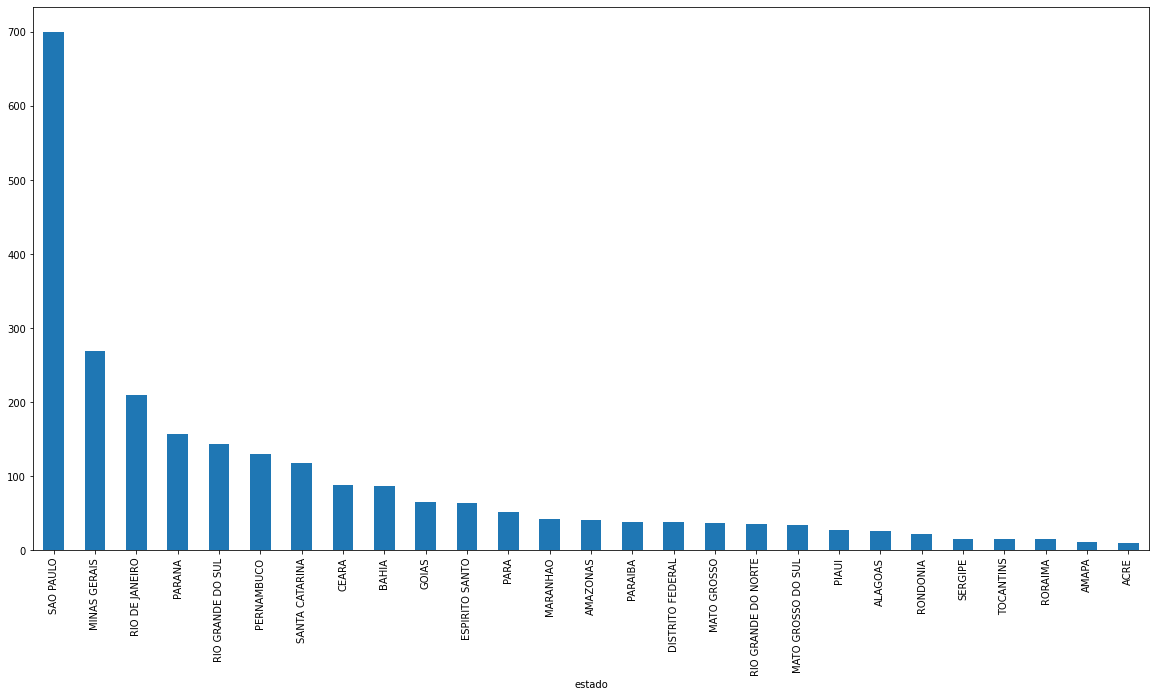

In [138]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

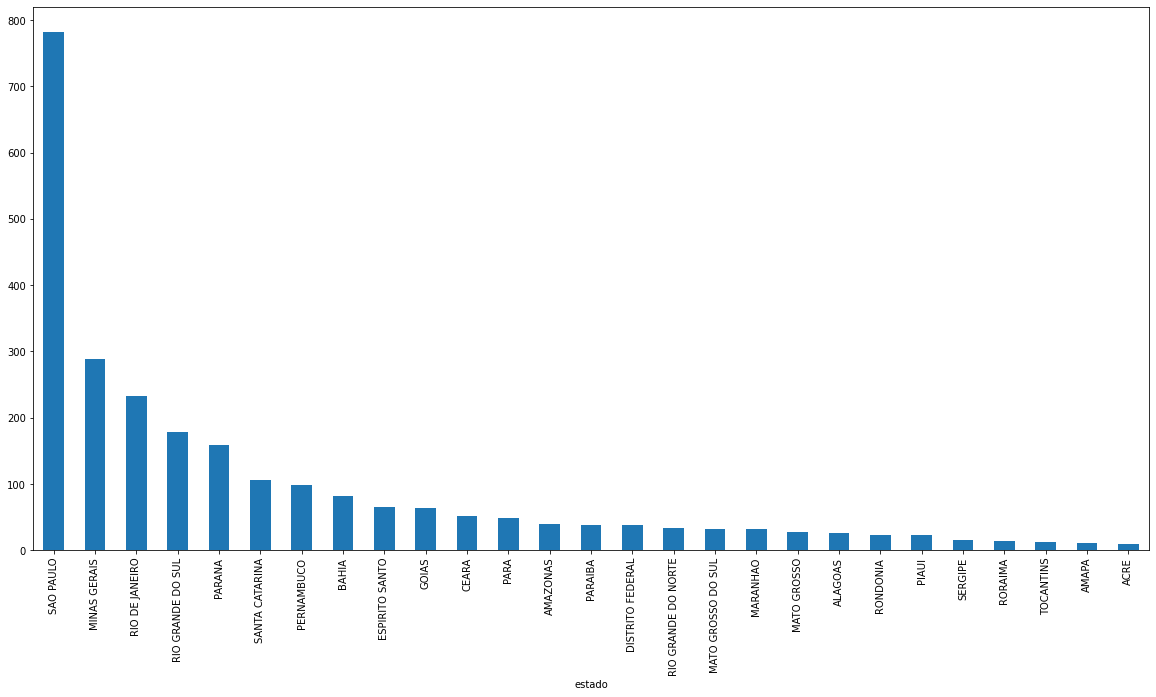

In [139]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

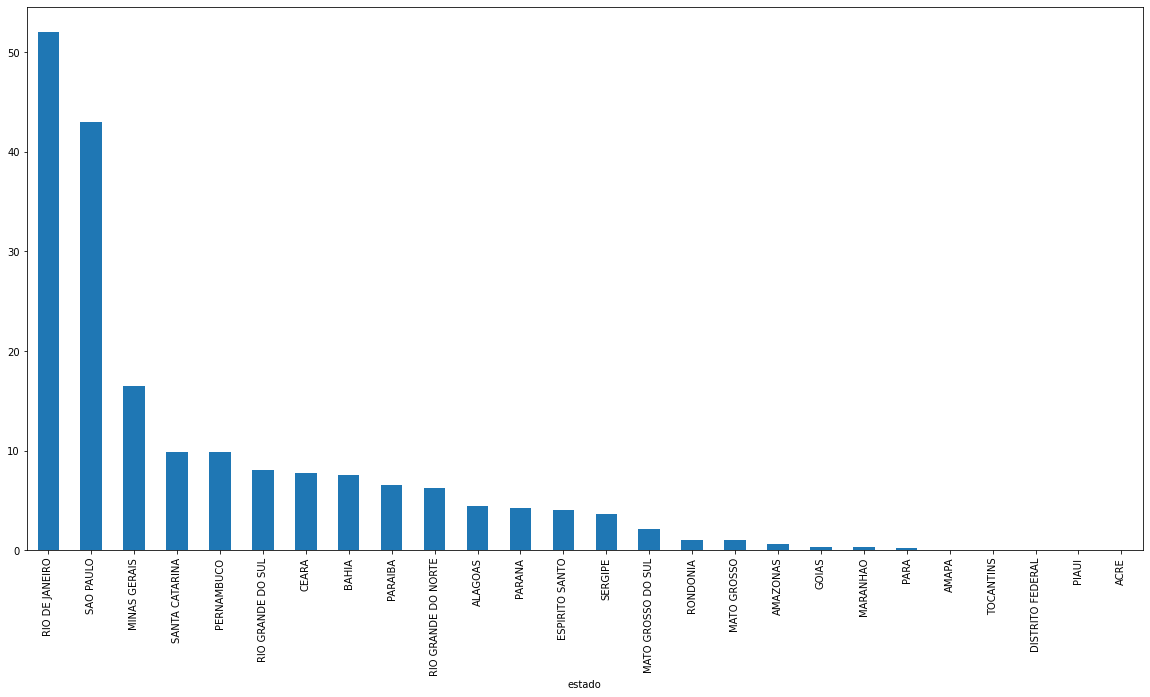

In [140]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

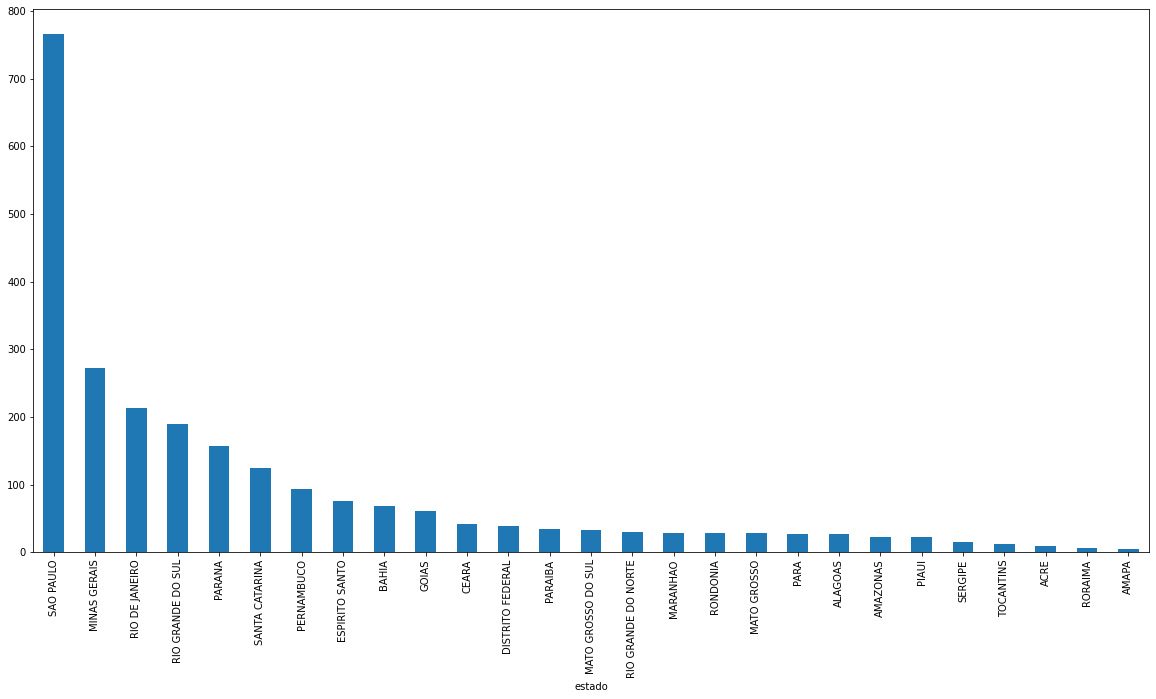

In [141]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Produto group by Regiao

### Agg Median

In [142]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### Etanol Hidratado

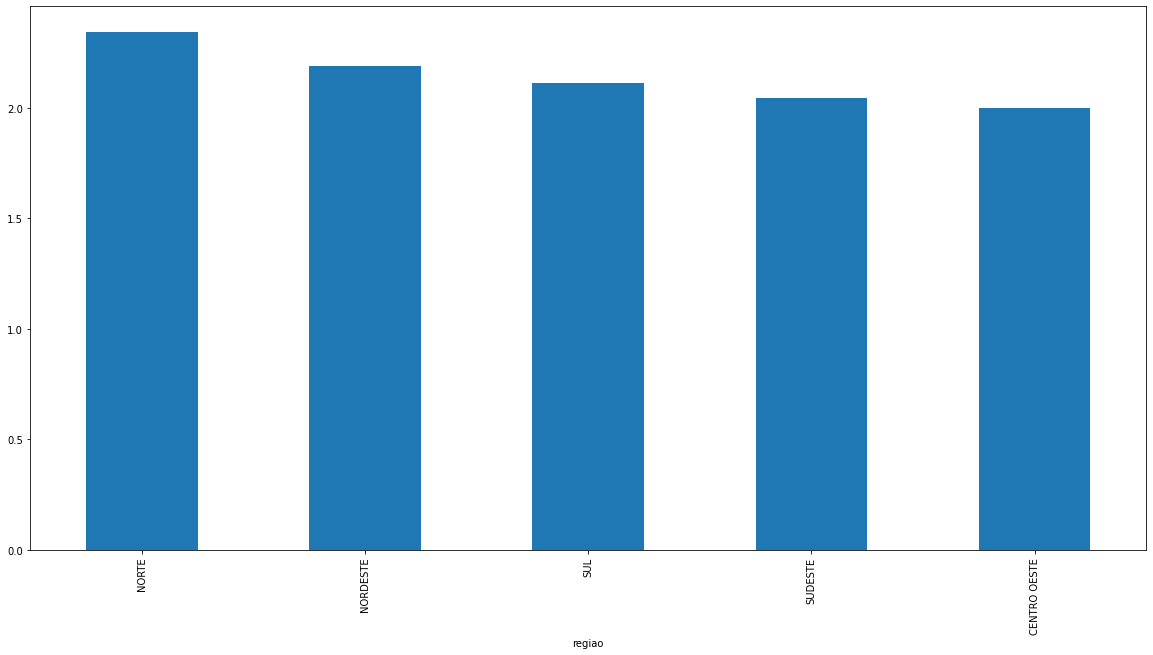

In [143]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [144]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### Gasolina Comum

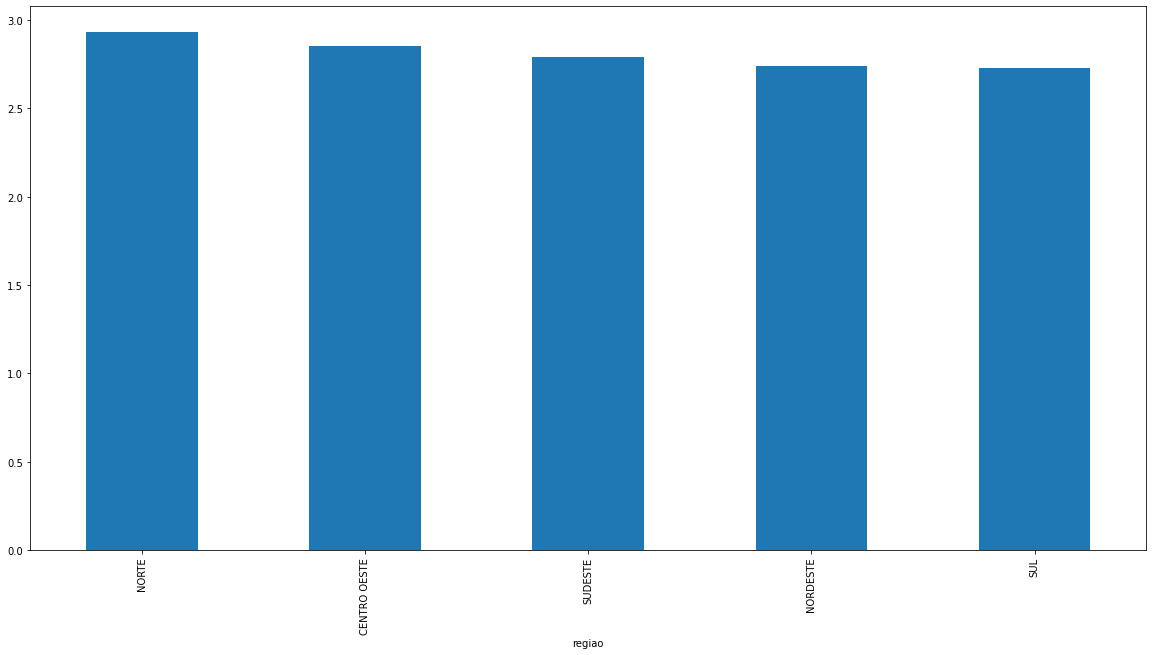

In [145]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [146]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### GLP

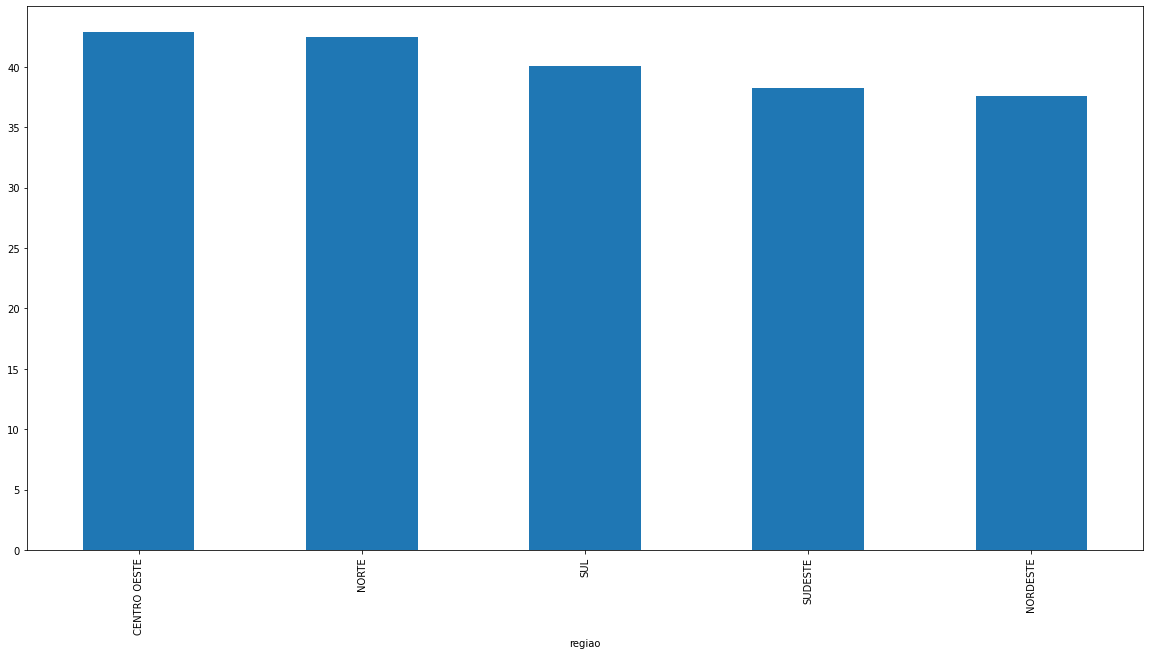

In [147]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [148]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### GNV

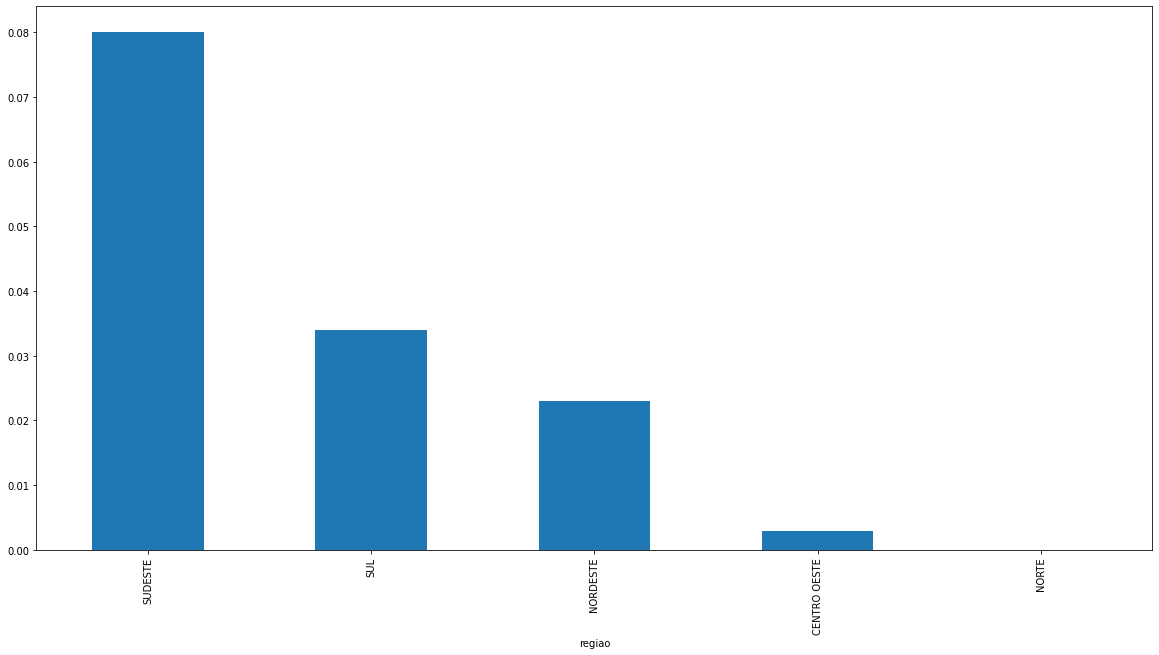

In [149]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

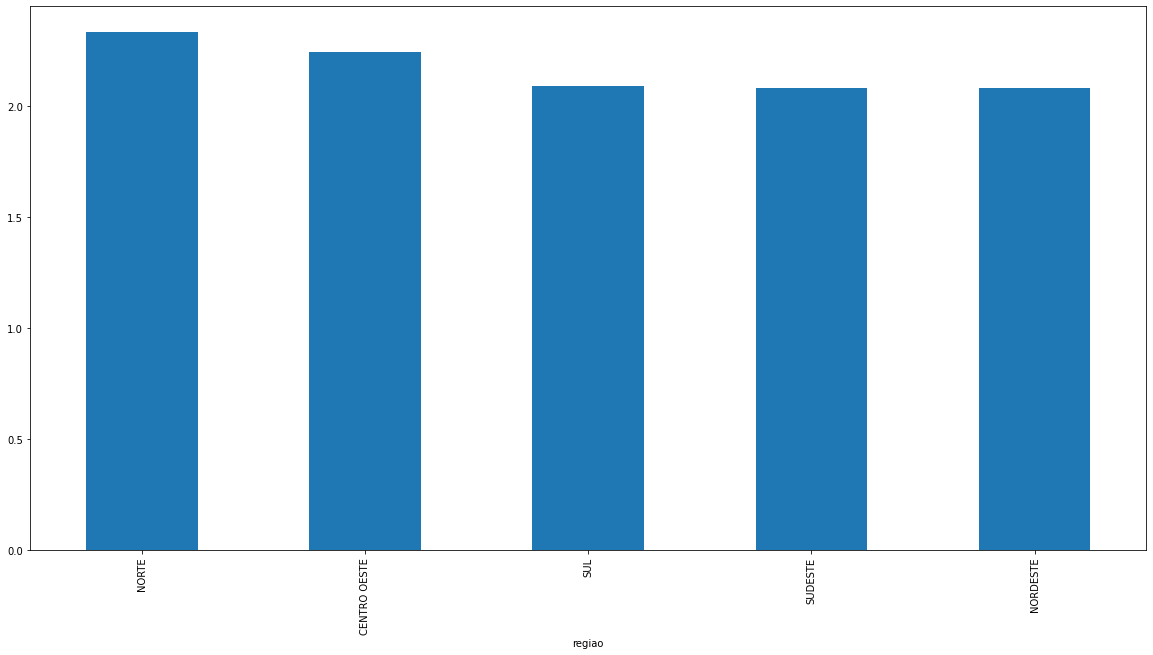

In [150]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

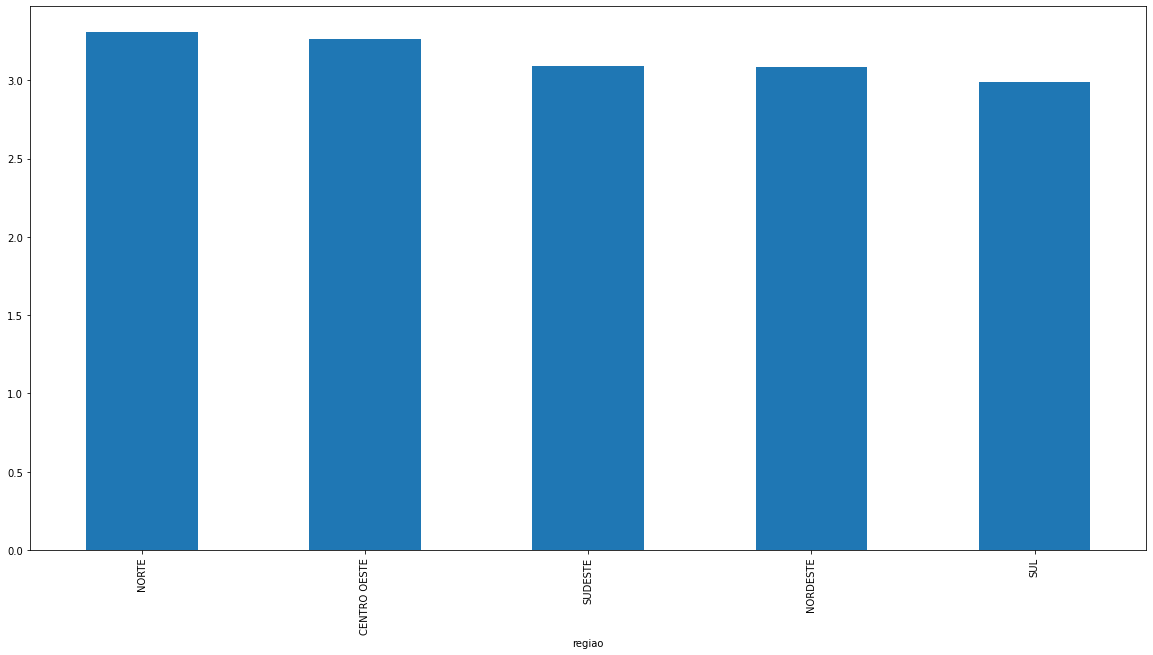

In [151]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg Var

#### Etanol Hidratado

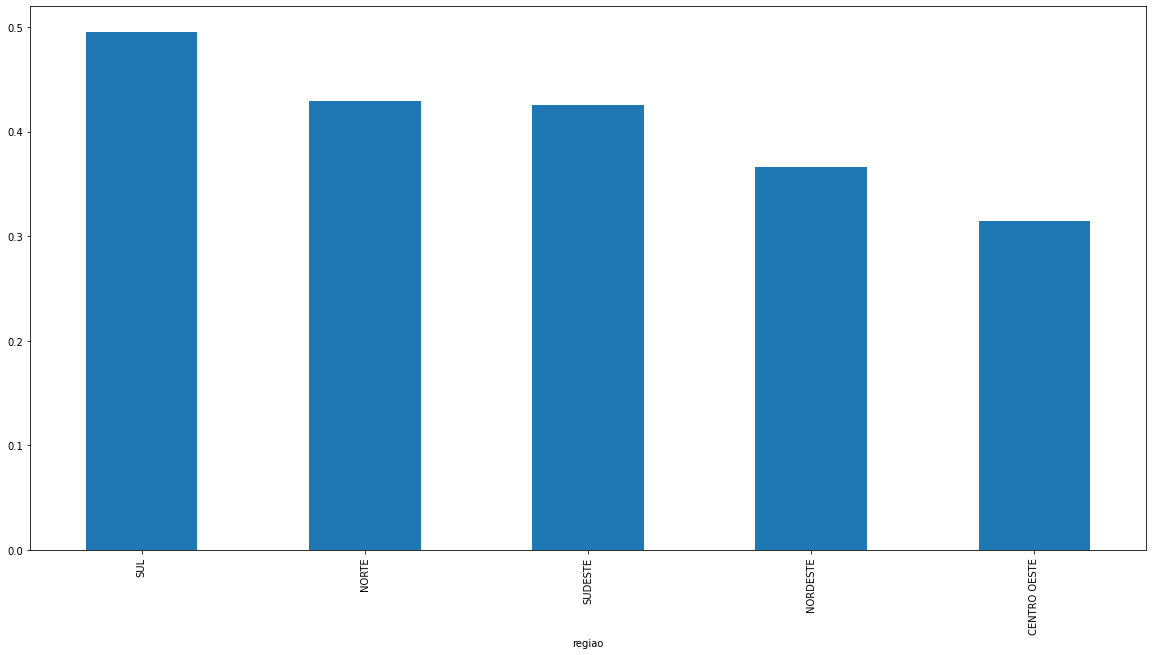

In [152]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Gasolina Comum

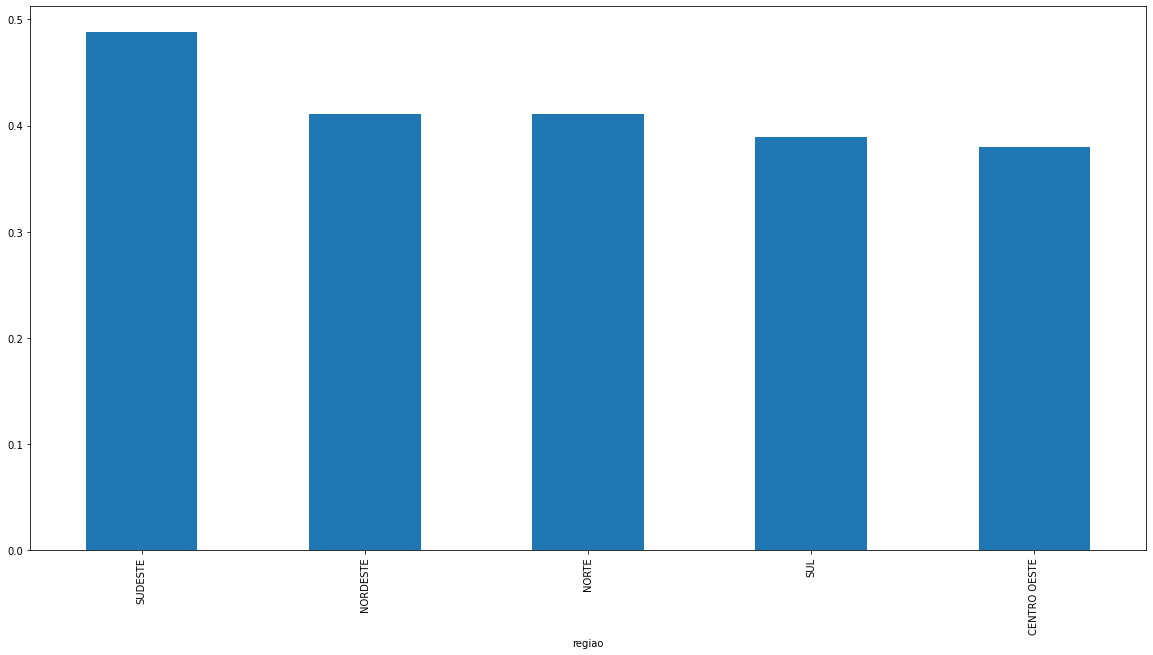

In [153]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GLP

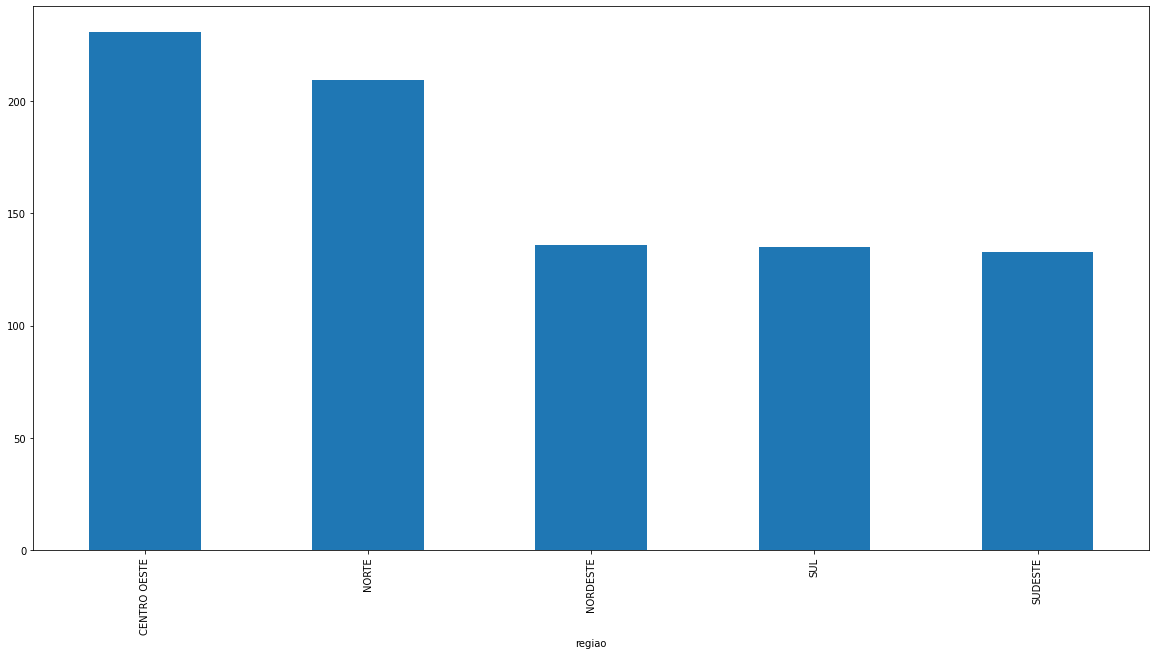

In [154]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GNV

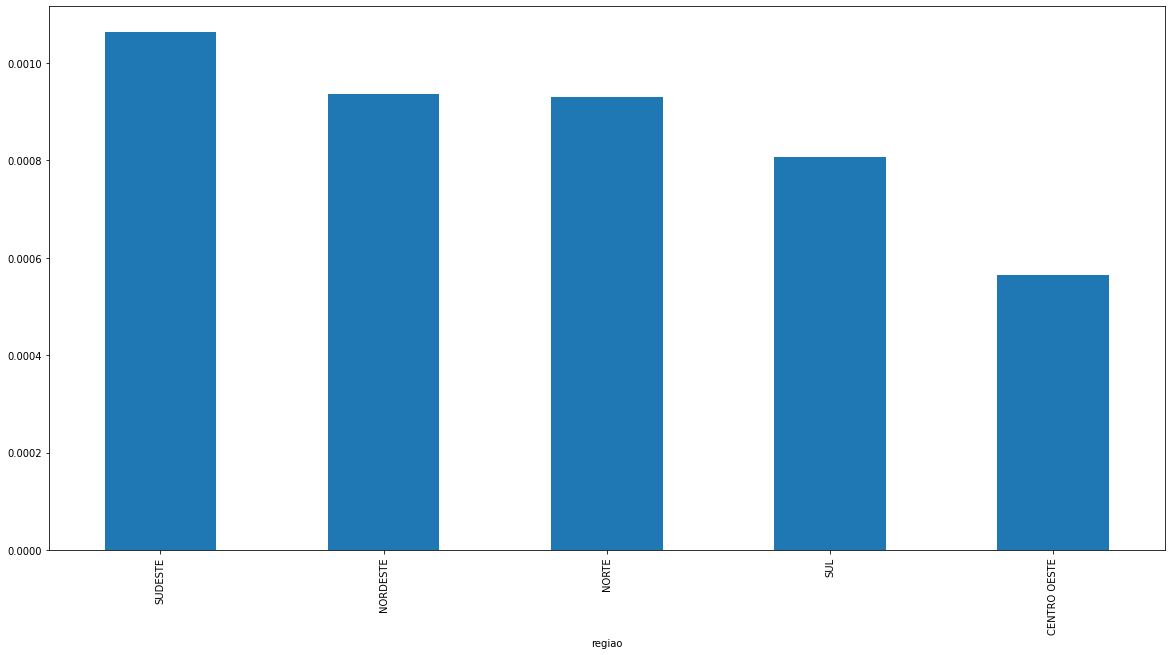

In [155]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

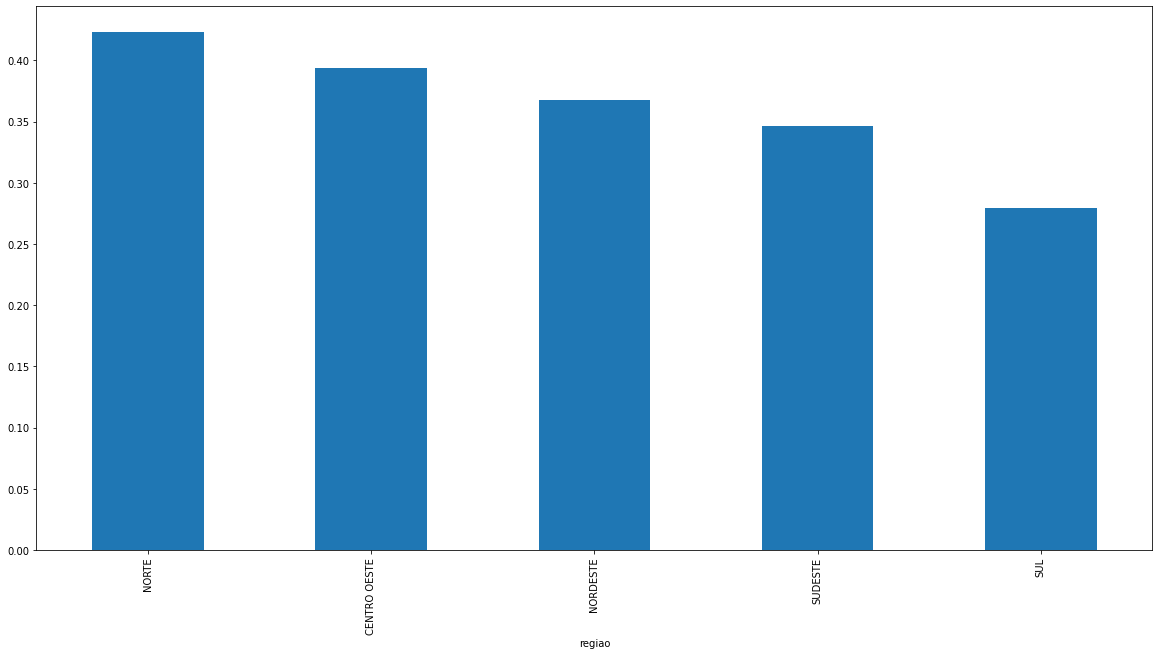

In [156]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

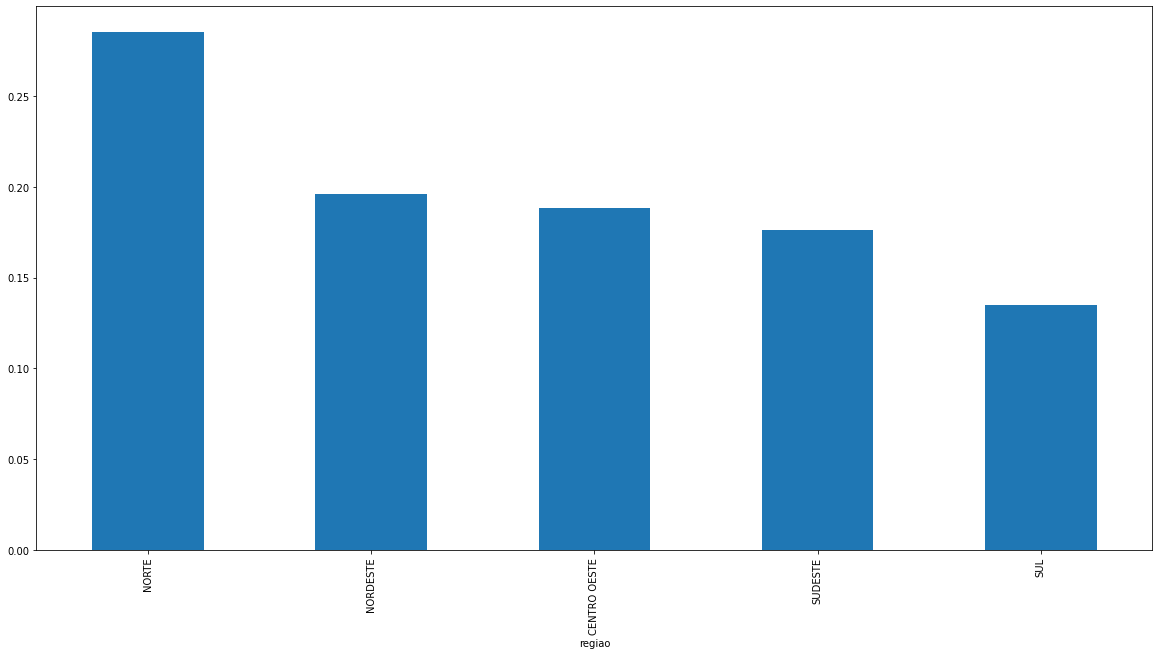

In [157]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg Std

#### Etanol Hidratado

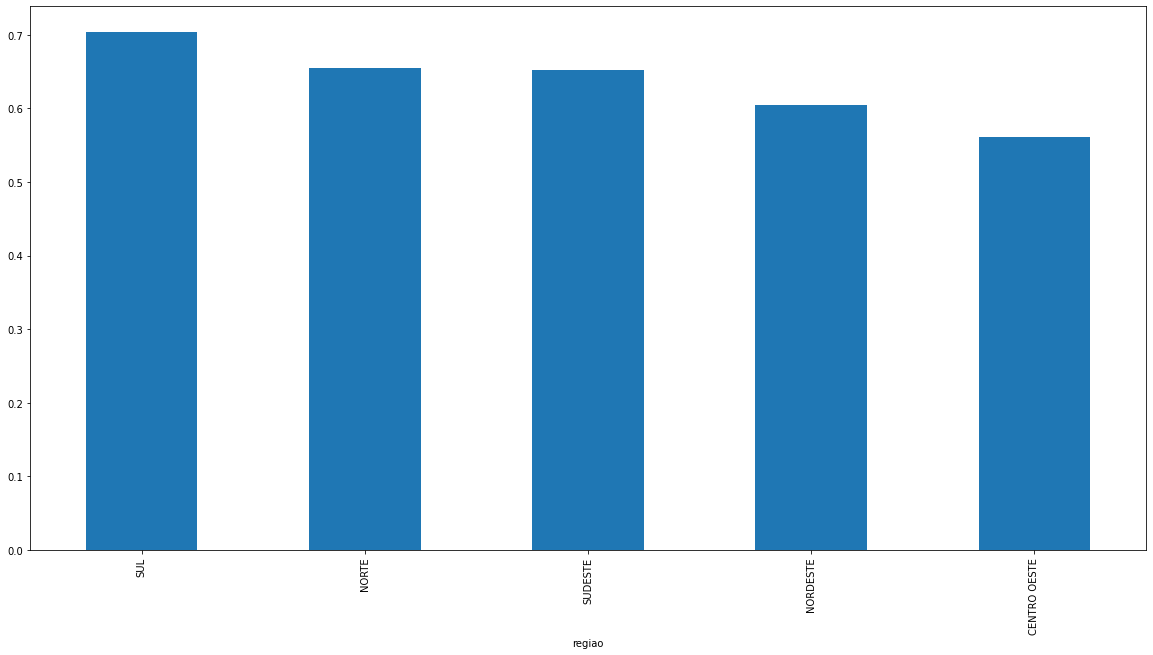

In [158]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Gasolina Comum

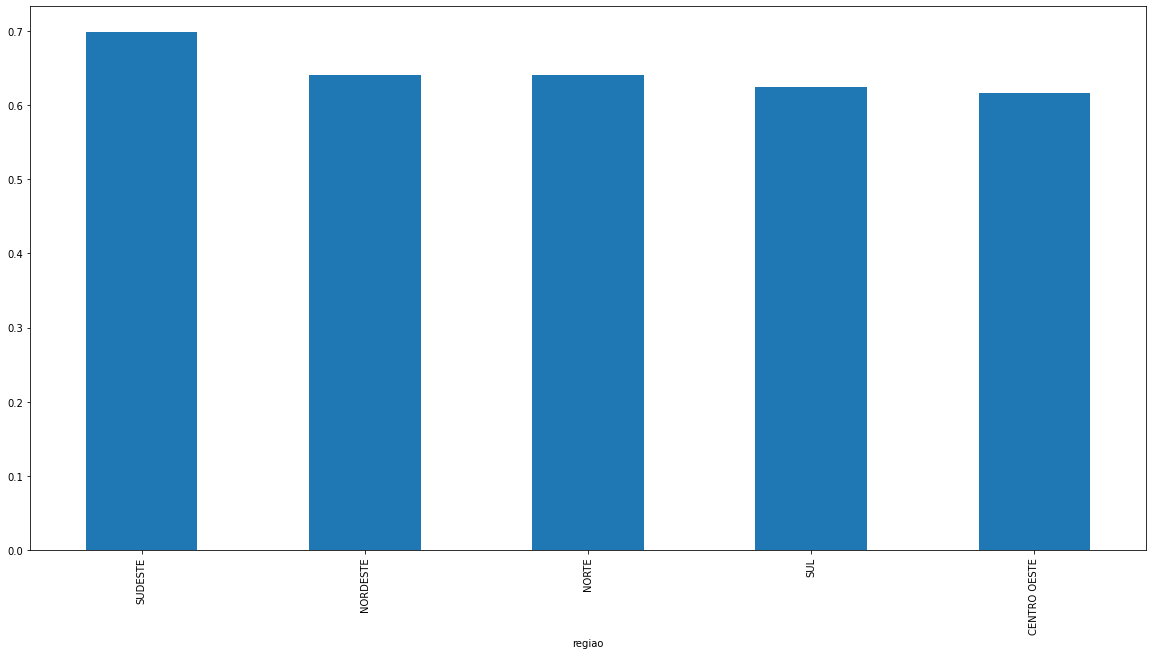

In [159]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GLP

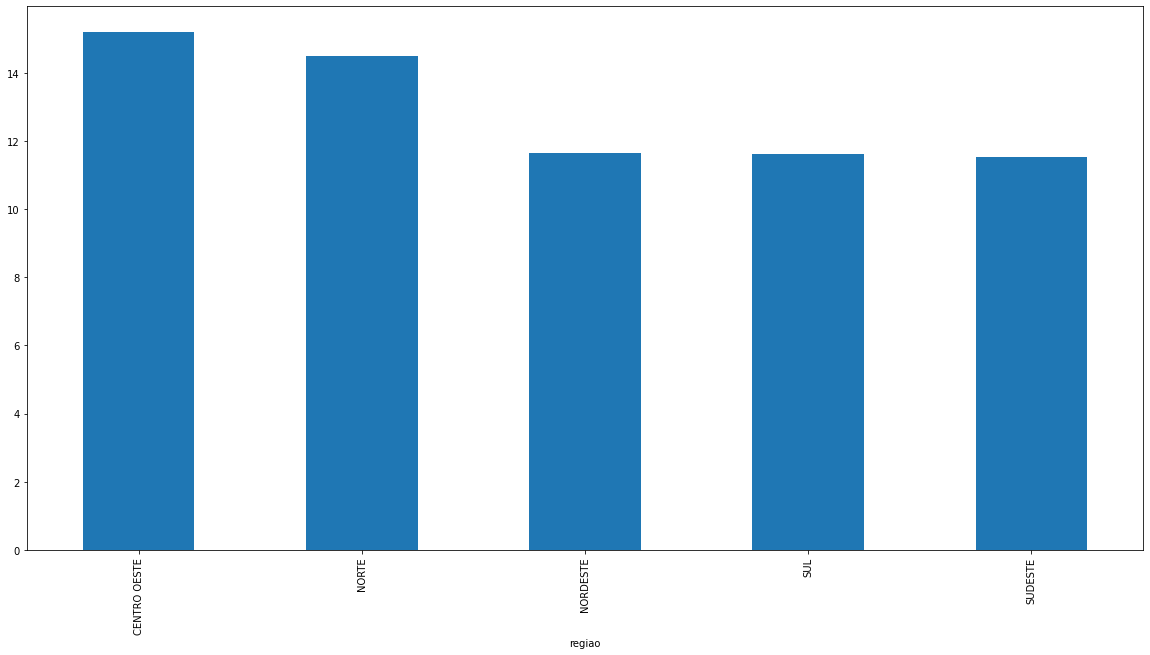

In [160]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GNV

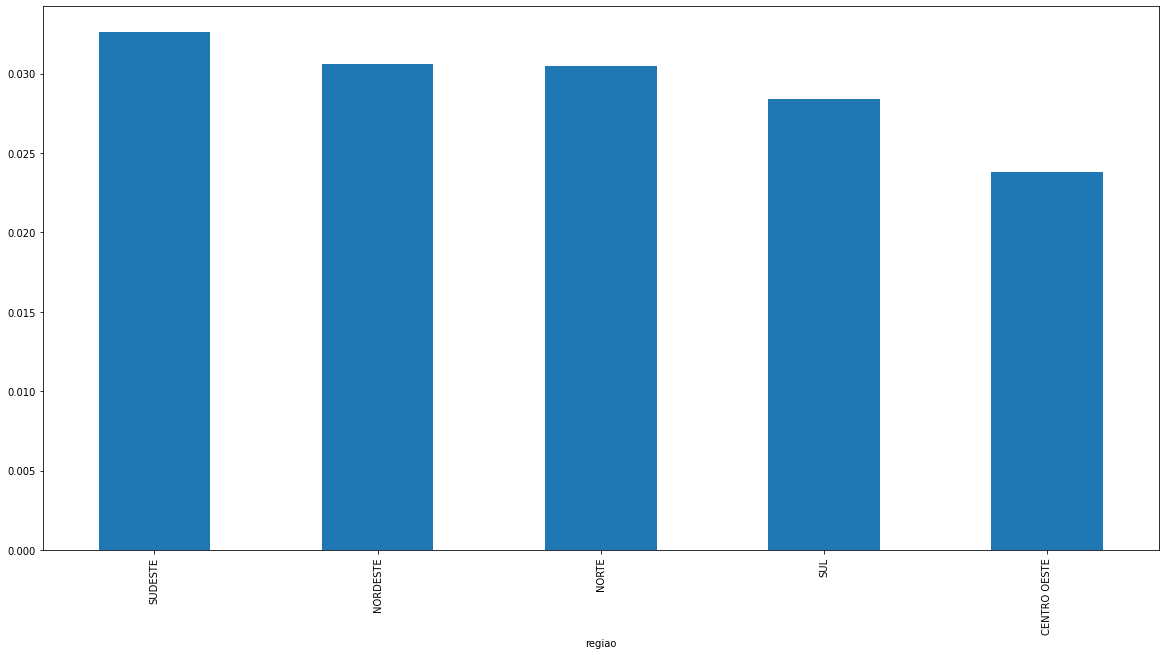

In [161]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

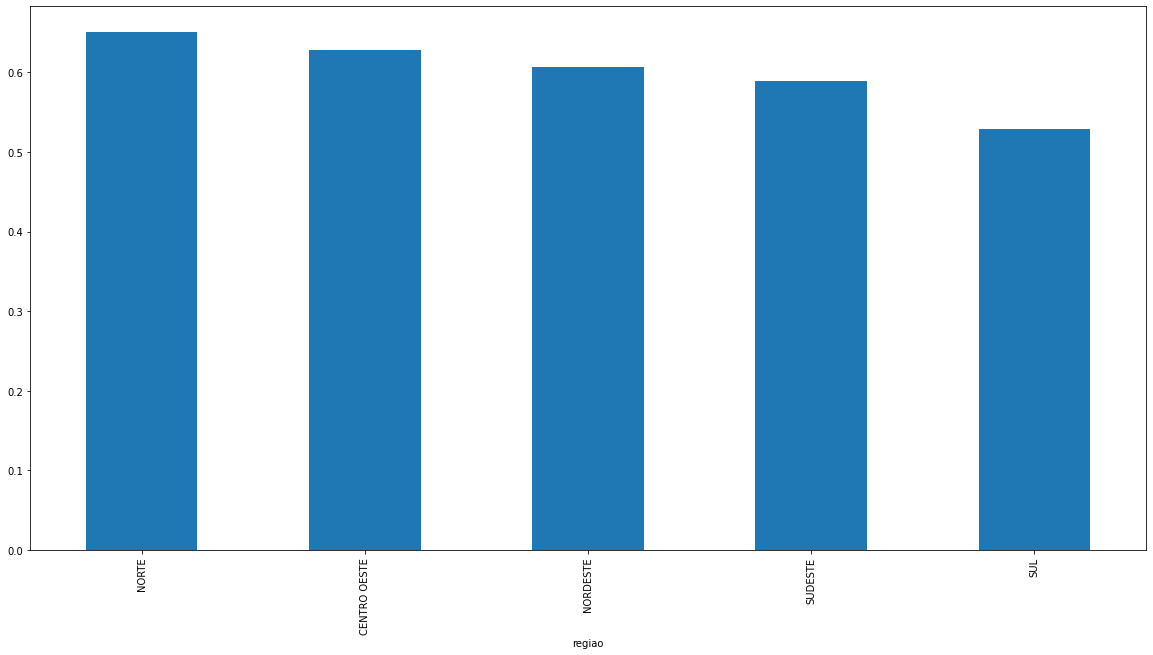

In [162]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

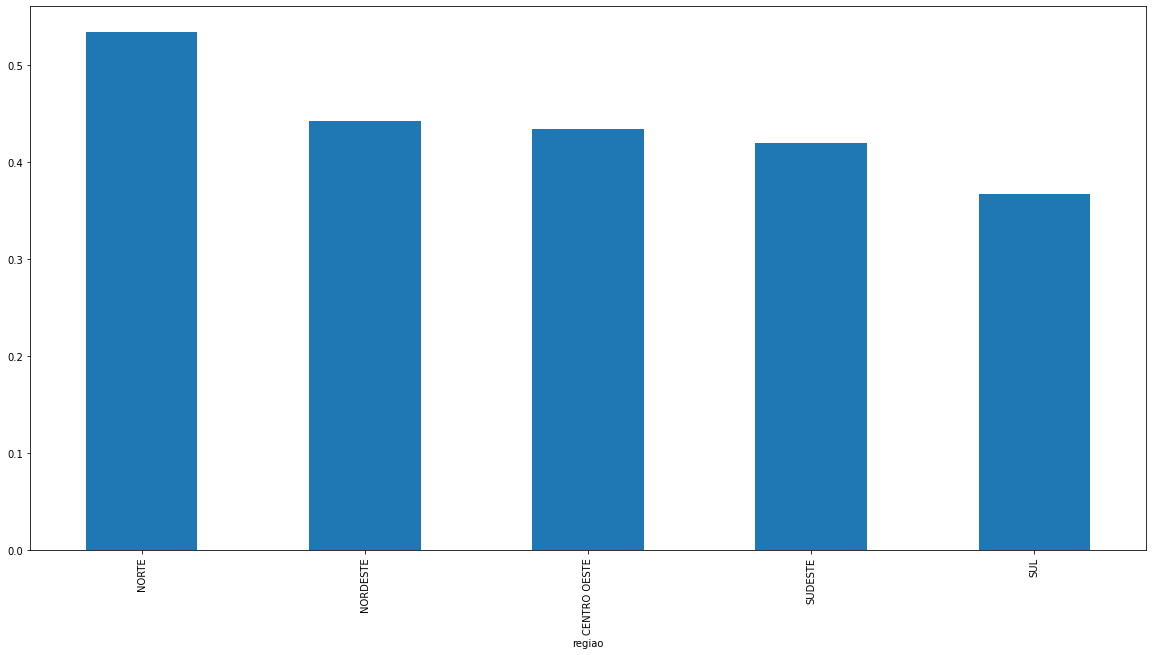

In [163]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Describe Statiscal by Region

In [164]:
interess_columns = ['numero_posto_pesquisado',	'preco_medio_revenda',	'coef_variacao_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda']

#### Nordeste

In [165]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000
mean,153.857022,2.322075,0.052014,0.115420,2.101505
std,120.269860,0.605121,0.020382,0.040703,0.591956
min,1.000000,1.181000,0.000000,0.000000,0.989000
25%,60.750000,1.825000,0.037000,0.083000,1.629750
50%,109.000000,2.188000,0.049000,0.111000,1.960000
75%,201.250000,2.675500,0.063000,0.142000,2.490000
max,543.000000,3.927000,0.192000,0.607000,3.779000


In [166]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000
mean,174.003255,3.002337,0.036350,0.108090,2.780906
std,124.712931,0.641163,0.014418,0.046229,0.626176
min,1.000000,1.949000,0.000000,0.000000,1.650000
25%,95.000000,2.584000,0.026000,0.075000,2.369000
50%,123.000000,2.742000,0.034000,0.100000,2.550000
75%,227.000000,3.425000,0.045000,0.134000,3.159000
max,625.000000,4.951000,0.115000,0.331000,4.699000


In [167]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000
mean,126.175754,42.221312,0.060799,2.687344,36.329123
std,98.123570,11.654978,0.027287,1.689359,10.264309
min,2.000000,28.367000,0.000000,0.000000,22.000000
25%,48.000000,33.598000,0.042000,1.473000,30.000000
50%,81.000000,37.575000,0.055000,2.167000,33.000000
75%,200.000000,48.183000,0.075000,3.458000,39.990000
max,493.000000,79.630000,0.208000,10.748000,75.000000


In [168]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000
mean,16.719462,1.925318,0.031211,0.060461,1.865387
std,9.616239,0.555183,0.030588,0.059619,0.544650
min,1.000000,0.975000,0.000000,0.000000,0.790000
25%,9.000000,1.603000,0.006000,0.012000,1.560000
50%,15.000000,1.821000,0.023000,0.044000,1.769000
75%,23.000000,2.168500,0.048000,0.091000,2.049000
max,51.000000,3.811000,0.228000,0.415000,3.790000


In [169]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000
mean,135.465110,2.347550,0.029399,0.069304,2.204314
std,107.453767,0.606381,0.009327,0.030279,0.579429
min,1.000000,1.313000,0.000000,0.000000,1.020000
25%,56.000000,1.900000,0.022000,0.048000,1.789000
50%,103.000000,2.082000,0.028000,0.062000,1.970000
75%,155.000000,2.873000,0.035000,0.083000,2.690000
max,535.000000,4.114000,0.092000,0.347000,3.974000


In [170]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3039.000000,3039.000000,3039.000000,3039.000000,3039.000000
mean,93.673906,3.041957,0.030019,0.091740,2.851449
std,71.716300,0.442555,0.010089,0.035688,0.418953
min,1.000000,2.130000,0.000000,0.000000,1.938000
25%,41.000000,2.600000,0.022000,0.065000,2.450000
50%,57.000000,3.087000,0.028000,0.086000,2.870000
75%,143.000000,3.338000,0.036000,0.111000,3.160000
max,277.000000,4.069000,0.084000,0.324000,4.069000


#### Norte

In [171]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,46.100296,2.530796,0.049130,0.120423,2.355618
std,32.288142,0.655421,0.026201,0.067850,0.642829
min,1.000000,1.226000,0.000000,0.000000,1.050000
25%,17.000000,2.046000,0.031000,0.074000,1.900000
50%,39.000000,2.343000,0.048000,0.115000,2.180000
75%,72.000000,2.935250,0.065000,0.156000,2.800000
max,150.000000,4.459000,0.167000,0.490000,4.459000


In [172]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000
mean,77.515471,3.149212,0.045072,0.140008,2.956985
std,54.804009,0.640964,0.022087,0.072269,0.619664
min,1.000000,1.995000,0.000000,0.000000,1.750000
25%,36.000000,2.705250,0.028000,0.085000,2.499000
50%,59.000000,2.932000,0.046000,0.135000,2.790000
75%,110.000000,3.579750,0.060000,0.181000,3.390000
max,265.000000,5.362000,0.168000,0.557000,5.220000


In [173]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000
mean,89.856025,47.174539,0.059644,2.825744,42.299359
std,65.694172,14.477296,0.028568,1.751676,13.065487
min,1.000000,28.086000,0.000000,0.000000,24.000000
25%,31.000000,36.509250,0.040000,1.621000,33.400000
50%,83.000000,42.453500,0.055000,2.331500,38.000000
75%,123.000000,54.635750,0.076000,3.580250,47.000000
max,383.000000,87.270000,0.176000,10.675000,85.000000


In [174]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,457.000000,457.000000,457.000000,457.000000,457.000000
mean,1.275711,2.000190,0.004575,0.009245,1.995431
std,0.564405,0.602366,0.030509,0.051896,0.599702
min,1.000000,1.219000,0.000000,0.000000,1.219000
25%,1.000000,1.399000,0.000000,0.000000,1.399000
50%,1.000000,1.850000,0.000000,0.000000,1.850000
75%,1.000000,2.300000,0.000000,0.000000,2.300000
max,5.000000,4.020000,0.395000,0.608000,4.020000


In [175]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000
mean,67.879505,2.569905,0.041250,0.105580,2.399594
std,46.709966,0.650350,0.016876,0.052298,0.622360
min,3.000000,1.450000,0.004000,0.009000,1.190000
25%,33.000000,2.088000,0.028000,0.067000,1.950000
50%,52.000000,2.334000,0.040000,0.092000,2.190000
75%,98.000000,3.080000,0.054000,0.137000,2.887500
max,240.000000,4.774000,0.102000,0.361000,4.430000


In [176]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,39.986011,3.310619,0.038558,0.127323,3.124608
std,31.581085,0.533966,0.018862,0.064742,0.505889
min,1.000000,2.172000,0.000000,0.000000,2.090000
25%,15.000000,2.878000,0.024000,0.078000,2.779000
50%,33.000000,3.307000,0.037000,0.120000,3.100000
75%,51.000000,3.653000,0.052000,0.168000,3.445000
max,146.000000,4.878000,0.103000,0.341000,4.799000


#### Centro-Oeste

In [177]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,154.982484,2.135950,0.055482,0.111622,1.927421
std,79.962627,0.561154,0.031299,0.054694,0.549582
min,1.000000,1.162000,0.000000,0.000000,0.870000
25%,87.000000,1.716000,0.038000,0.080000,1.540000
50%,140.000000,2.001000,0.053000,0.111000,1.800000
75%,205.250000,2.479000,0.071000,0.145000,2.270000
max,487.000000,3.999000,0.212000,0.336000,3.999000


In [178]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,155.204777,3.078123,0.033592,0.103984,2.867660
std,80.280425,0.616315,0.018085,0.058923,0.583086
min,1.000000,1.936000,0.000000,0.000000,1.730000
25%,88.000000,2.668000,0.024000,0.067000,2.479000
50%,139.000000,2.856000,0.033000,0.102000,2.700000
75%,205.000000,3.460250,0.045000,0.145000,3.189000
max,492.000000,4.963000,0.095000,0.312000,4.849000


In [179]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,200.619063,48.181149,0.057588,2.904754,40.957995
std,147.639427,15.189152,0.019181,1.678944,11.446404
min,1.000000,28.791000,0.000000,0.000000,24.900000
25%,106.000000,37.340000,0.047000,1.925000,33.000000
50%,130.000000,42.857000,0.058000,2.402000,38.000000
75%,221.000000,55.905000,0.070000,3.694000,45.000000
max,766.000000,99.357000,0.137000,9.842000,90.000000


In [180]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,2.880499,2.004153,0.012368,0.025300,1.980121
std,1.944069,0.457802,0.023778,0.048291,0.450621
min,1.000000,1.097000,0.000000,0.000000,1.090000
25%,1.000000,1.599000,0.000000,0.000000,1.594500
50%,2.000000,1.955000,0.003000,0.005000,1.940000
75%,4.000000,2.352500,0.017000,0.035000,2.299000
max,10.000000,3.890000,0.262000,0.530000,3.890000


In [181]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,131.744268,2.481534,0.032104,0.081501,2.310914
std,77.911623,0.627607,0.010553,0.039698,0.576417
min,1.000000,1.435000,0.000000,0.000000,1.270000
25%,78.000000,2.033000,0.028000,0.062000,1.909750
50%,116.000000,2.245500,0.033000,0.075000,2.070000
75%,174.000000,3.019000,0.038000,0.101000,2.810000
max,430.000000,4.162000,0.077000,0.279000,3.969000


In [182]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,71.498888,3.241185,0.030342,0.100953,3.034001
std,40.459483,0.433797,0.012452,0.047255,0.367446
min,1.000000,2.212000,0.000000,0.000000,2.039000
25%,34.000000,2.820000,0.025000,0.072000,2.720000
50%,70.000000,3.264000,0.032000,0.103000,3.050000
75%,99.000000,3.584000,0.038000,0.130000,3.290000
max,185.000000,4.200000,0.103000,0.400000,3.990000


#### Sudeste

In [183]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.00000,3140.000000
mean,1037.788217,2.164832,0.064103,0.13450,1.811892
std,930.151694,0.652355,0.016659,0.04272,0.595626
min,6.000000,0.766000,0.022000,0.03800,0.590000
25%,294.000000,1.692750,0.051000,0.10200,1.369750
50%,729.000000,2.043500,0.063000,0.12550,1.749500
75%,1322.250000,2.572000,0.074000,0.15900,2.190000
max,4111.000000,4.115000,0.144000,0.34700,3.550000


In [184]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1051.909236,3.000565,0.041105,0.122024,2.698406
std,927.410130,0.698573,0.008148,0.031301,0.652272
min,16.000000,1.888000,0.014000,0.035000,1.390000
25%,299.000000,2.502000,0.037000,0.101000,2.225000
50%,740.000000,2.793000,0.041000,0.119000,2.490000
75%,1369.250000,3.451500,0.046000,0.141000,3.079000
max,4167.000000,5.119000,0.067000,0.228000,4.690000


In [185]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,756.676330,42.077813,0.070811,3.116207,33.298655
std,652.446822,11.522013,0.020525,1.577819,8.644641
min,4.000000,28.026000,0.019000,0.895000,21.990000
25%,223.000000,33.638500,0.056000,1.805000,27.900000
50%,410.000000,38.266000,0.064000,2.502000,30.000000
75%,1095.500000,49.251000,0.086000,4.194500,36.000000
max,2165.000000,79.192000,0.150000,9.632000,60.000000


In [186]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,74.804528,1.779684,0.073378,0.130339,1.620741
std,73.478539,0.507284,0.032606,0.067095,0.506107
min,1.000000,0.996000,0.000000,0.000000,0.659000
25%,13.000000,1.473000,0.053000,0.082000,1.299000
50%,47.000000,1.694000,0.080000,0.137000,1.499000
75%,118.000000,2.003000,0.095000,0.169000,1.829000
max,294.000000,3.594000,0.201000,0.467000,3.499000


In [187]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.00000,3140.000000
mean,771.300955,2.339699,0.034798,0.08267,2.118881
std,684.255256,0.588641,0.006696,0.03128,0.529802
min,12.000000,1.356000,0.015000,0.02900,1.030000
25%,208.000000,1.876000,0.030000,0.05800,1.740000
50%,587.000000,2.082500,0.034000,0.07300,1.920000
75%,910.000000,2.825000,0.040000,0.09800,2.590000
max,3237.000000,3.994000,0.066000,0.20900,3.679000


In [188]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,418.820266,3.054425,0.035362,0.109619,2.764236
std,383.216315,0.419618,0.006943,0.032080,0.363182
min,3.000000,2.180000,0.009000,0.021000,1.990000
25%,98.750000,2.647000,0.031000,0.084000,2.443750
50%,307.000000,3.090000,0.034000,0.104000,2.789500
75%,467.000000,3.386000,0.039000,0.133000,2.999000
max,1374.000000,4.080000,0.059000,0.206000,3.790000


#### Sul

In [189]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2354.00000,2354.000000,2354.000000,2354.000000,2354.000000
mean,454.70051,2.268864,0.055959,0.123692,1.947870
std,179.56283,0.703567,0.015455,0.042988,0.645103
min,9.00000,0.922000,0.028000,0.050000,0.730000
25%,361.00000,1.721000,0.045000,0.091000,1.450000
50%,500.50000,2.114000,0.053000,0.113000,1.838000
75%,566.00000,2.603250,0.063000,0.143000,2.270000
max,871.00000,4.287000,0.133000,0.351000,3.899000


In [190]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,495.765180,2.973136,0.039307,0.117797,2.678423
std,176.288129,0.624032,0.009078,0.039274,0.584063
min,8.000000,1.961000,0.016000,0.040000,1.720000
25%,377.000000,2.543000,0.033000,0.088000,2.279000
50%,519.000000,2.732000,0.039000,0.109000,2.459000
75%,612.000000,3.343500,0.044000,0.145000,3.017000
max,924.000000,4.953000,0.072000,0.262000,4.649000


In [191]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,485.472611,43.535465,0.075282,3.417876,34.981443
std,230.611229,11.628193,0.019763,1.653459,8.858793
min,12.000000,29.440000,0.028000,0.952000,22.200000
25%,293.500000,34.824500,0.062000,2.205500,29.500000
50%,526.000000,40.047000,0.072000,2.754000,32.000000
75%,703.000000,51.412500,0.088000,4.974000,38.000000
max,1416.000000,72.088000,0.157000,10.270000,65.000000


In [192]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,19.042680,1.907944,0.036284,0.073314,1.823597
std,11.497591,0.500694,0.028398,0.060311,0.450544
min,1.000000,1.168000,0.000000,0.000000,1.119000
25%,9.000000,1.512000,0.017000,0.029000,1.490000
50%,17.000000,1.800000,0.034000,0.066000,1.730000
75%,27.000000,2.192500,0.048000,0.103000,1.999000
max,60.000000,3.499000,0.233000,0.487000,3.480000


In [193]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,364.018684,2.332862,0.034150,0.081929,2.125472
std,153.987726,0.528454,0.006875,0.033310,0.477011
min,7.000000,1.374000,0.022000,0.039000,1.219000
25%,240.000000,1.951000,0.030000,0.058000,1.786000
50%,360.000000,2.090000,0.032000,0.066000,1.940000
75%,470.000000,2.785500,0.037000,0.099000,2.519000
max,712.000000,3.800000,0.069000,0.224000,3.490000


In [194]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,229.859961,2.981745,0.036429,0.110322,2.707422
std,70.287073,0.366952,0.007774,0.033359,0.319604
min,7.000000,2.140000,0.020000,0.043000,2.019000
25%,183.000000,2.663000,0.030000,0.083250,2.440000
50%,243.500000,2.991000,0.034000,0.100000,2.740000
75%,284.750000,3.254000,0.041000,0.137000,2.940000
max,368.000000,3.815000,0.059000,0.220000,3.599000


# 4.2 Estatistica Bivariada

In [195]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

### Covariancia

In [196]:
interess_columns = ['numero_posto_pesquisado',	'preco_medio_revenda',	'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']

#### ETANOL HIDRATADO

In [197]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,248748.275616,-101.035621,2.934925,-82.210054,3.105797
preco_medio_revenda,-101.035621,0.418206,-0.005379,0.355386,-0.006059
coef_variacao_revenda,2.934925,-0.005379,0.000552,-0.003993,0.000331
preco_medio_distribuicao,-82.210054,0.355386,-0.003993,0.394294,-0.004629
coef_variacao_distribuicao,3.105797,-0.006059,0.000331,-0.004629,0.000760


#### GASOLINA COMUM

In [198]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,246871.931781,-66.436053,0.754207,-52.495171,0.540809
preco_medio_revenda,-66.436053,0.419744,-0.000691,0.381228,0.000241
coef_variacao_revenda,0.754207,-0.000691,0.000280,-0.000229,0.000049
preco_medio_distribuicao,-52.495171,0.381228,-0.000229,0.368260,0.000210
coef_variacao_distribuicao,0.540809,0.000241,0.000049,0.000210,0.000075


#### GLP

In [199]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,132718.550465,-909.710315,1.515655,-615.432201,4.492392
preco_medio_revenda,-909.710315,175.019090,0.090694,118.430381,0.083553
coef_variacao_revenda,1.515655,0.090694,0.000655,0.038227,0.000384
preco_medio_distribuicao,-615.432201,118.430381,0.038227,140.036845,0.112801
coef_variacao_distribuicao,4.492392,0.083553,0.000384,0.112801,0.001761


#### GNV

In [200]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,2056.314992,-6.382406,0.614351,0.887693,1.353241
preco_medio_revenda,-6.382406,0.281332,-0.000630,0.092604,-0.017634
coef_variacao_revenda,0.614351,-0.000630,0.001335,0.003230,0.000804
preco_medio_distribuicao,0.887693,0.092604,0.003230,0.371860,0.004571
coef_variacao_distribuicao,1.353241,-0.017634,0.000804,0.004571,0.006149


#### ÓLEO DIESEL

In [201]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,133877.802943,-61.470448,0.005152,-52.946925,-0.130392
preco_medio_revenda,-61.470448,0.382798,0.001056,0.331678,0.001727
coef_variacao_revenda,0.005152,0.001056,0.000152,0.000757,0.000044
preco_medio_distribuicao,-52.946925,0.331678,0.000757,0.301330,0.001398
coef_variacao_distribuicao,-0.130392,0.001727,0.000044,0.001398,0.000102


#### ÓLEO DIESEL S10

In [202]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].cov()


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,40971.323049,-4.437845,0.356839,1.642075,0.396663
preco_medio_revenda,-4.437845,0.224114,0.001076,0.208550,0.001103
coef_variacao_revenda,0.356839,0.001076,0.000176,0.001833,0.000069
preco_medio_distribuicao,1.642075,0.208550,0.001833,0.324763,0.002058
coef_variacao_distribuicao,0.396663,0.001103,0.000069,0.002058,0.000135


## Pearson Correlation

#### ETANOL HIDRATADO

In [203]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.313256,0.250506,-0.262503,0.225916
preco_medio_revenda,-0.313256,1.000000,-0.354072,0.875176,-0.339928
coef_variacao_revenda,0.250506,-0.354072,1.000000,-0.270732,0.511537
preco_medio_distribuicao,-0.262503,0.875176,-0.270732,1.000000,-0.267415
coef_variacao_distribuicao,0.225916,-0.339928,0.511537,-0.267415,1.000000


#### GASOLINA COMUM

In [204]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.206384,0.090713,-0.174103,0.125677
preco_medio_revenda,-0.206384,1.000000,-0.063720,0.969650,0.043006
coef_variacao_revenda,0.090713,-0.063720,1.000000,-0.022567,0.338423
preco_medio_distribuicao,-0.174103,0.969650,-0.022567,1.000000,0.040035
coef_variacao_distribuicao,0.125677,0.043006,0.338423,0.040035,1.000000


#### GLP

In [205]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.188753,0.162600,-0.142756,0.293896
preco_medio_revenda,-0.188753,1.000000,0.267930,0.756483,0.150522
coef_variacao_revenda,0.162600,0.267930,1.000000,0.126253,0.357581
preco_medio_distribuicao,-0.142756,0.756483,0.126253,1.000000,0.227181
coef_variacao_distribuicao,0.293896,0.150522,0.357581,0.227181,1.000000


#### GNV

In [206]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.265357,0.370727,0.032102,0.380550
preco_medio_revenda,-0.265357,1.000000,-0.032520,0.286307,-0.423963
coef_variacao_revenda,0.370727,-0.032520,1.000000,0.144931,0.280624
preco_medio_distribuicao,0.032102,0.286307,0.144931,1.000000,0.095584
coef_variacao_distribuicao,0.380550,-0.423963,0.280624,0.095584,1.000000


#### ÓLEO DIESEL

In [207]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.271536,0.001140,-0.263612,-0.035278
preco_medio_revenda,-0.271536,1.000000,0.138202,0.976587,0.276395
coef_variacao_revenda,0.001140,0.138202,1.000000,0.111671,0.354401
preco_medio_distribuicao,-0.263612,0.976587,0.111671,1.000000,0.252135
coef_variacao_distribuicao,-0.035278,0.276395,0.354401,0.252135,1.000000


#### ÓLEO DIESEL S10

In [208]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].corr(method='pearson')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.046312,0.132755,0.014235,0.168371
preco_medio_revenda,-0.046312,1.000000,0.171223,0.773023,0.200107
coef_variacao_revenda,0.132755,0.171223,1.000000,0.242188,0.445142
preco_medio_distribuicao,0.014235,0.773023,0.242188,1.000000,0.310315
coef_variacao_distribuicao,0.168371,0.200107,0.445142,0.310315,1.000000


## Spearman Correlation

#### ETANOL HIDRATADO

In [209]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.424414,0.415824,-0.352392,0.360758
preco_medio_revenda,-0.424414,1.000000,-0.374101,0.942707,-0.370106
coef_variacao_revenda,0.415824,-0.374101,1.000000,-0.335815,0.515482
preco_medio_distribuicao,-0.352392,0.942707,-0.335815,1.000000,-0.346895
coef_variacao_distribuicao,0.360758,-0.370106,0.515482,-0.346895,1.000000


#### GASOLINA COMUM

In [210]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.307140,0.215292,-0.259720,0.250168
preco_medio_revenda,-0.307140,1.000000,-0.085125,0.970246,0.082423
coef_variacao_revenda,0.215292,-0.085125,1.000000,-0.017036,0.353095
preco_medio_distribuicao,-0.259720,0.970246,-0.017036,1.000000,0.067121
coef_variacao_distribuicao,0.250168,0.082423,0.353095,0.067121,1.000000


#### GLP

In [211]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.227309,0.301475,-0.225930,0.394218
preco_medio_revenda,-0.227309,1.000000,0.309383,0.837518,0.118170
coef_variacao_revenda,0.301475,0.309383,1.000000,0.167275,0.381701
preco_medio_distribuicao,-0.225930,0.837518,0.167275,1.000000,0.139494
coef_variacao_distribuicao,0.394218,0.118170,0.381701,0.139494,1.000000


#### GNV

In [212]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.293219,0.465140,0.134110,0.631683
preco_medio_revenda,-0.293219,1.000000,0.050218,0.495107,-0.471597
coef_variacao_revenda,0.465140,0.050218,1.000000,0.222907,0.288841
preco_medio_distribuicao,0.134110,0.495107,0.222907,1.000000,0.002747
coef_variacao_distribuicao,0.631683,-0.471597,0.288841,0.002747,1.000000


#### ÓLEO DIESEL

In [213]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.457488,0.093261,-0.444615,-0.024577
preco_medio_revenda,-0.457488,1.000000,0.137378,0.988778,0.340679
coef_variacao_revenda,0.093261,0.137378,1.000000,0.118121,0.381024
preco_medio_distribuicao,-0.444615,0.988778,0.118121,1.000000,0.315791
coef_variacao_distribuicao,-0.024577,0.340679,0.381024,0.315791,1.000000


#### ÓLEO DIESEL S10

In [214]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].corr(method='spearman')


,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,-0.048853,0.280670,-0.017193,0.238387
preco_medio_revenda,-0.048853,1.000000,0.196961,0.969799,0.194351
coef_variacao_revenda,0.280670,0.196961,1.000000,0.200042,0.506252
preco_medio_distribuicao,-0.017193,0.969799,0.200042,1.000000,0.186446
coef_variacao_distribuicao,0.238387,0.194351,0.506252,0.186446,1.000000


## Scatter Plot

In [215]:
interess_columns

['numero_posto_pesquisado',
 'preco_medio_revenda',
 'coef_variacao_revenda',
 'preco_medio_distribuicao',
 'coef_variacao_distribuicao']

#### numero_posto_pesquisado vs preco_medio_revenda

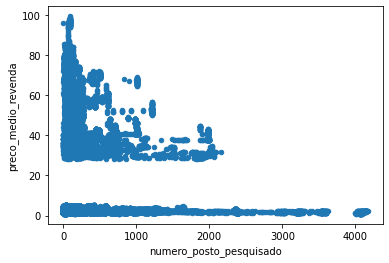

In [216]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='preco_medio_revenda')


#### numero_posto_pesquisado vs coef_variacao_revenda

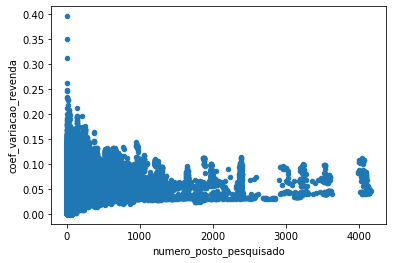

In [217]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='coef_variacao_revenda')


#### numero_posto_pesquisado vs preco_medio_distribuicao

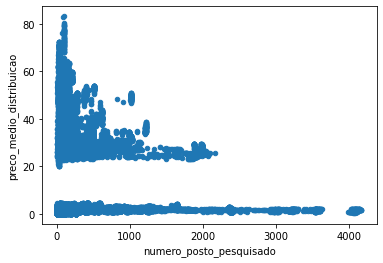

In [218]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='preco_medio_distribuicao')


#### numero_posto_pesquisado vs coef_variacao_distribuicao

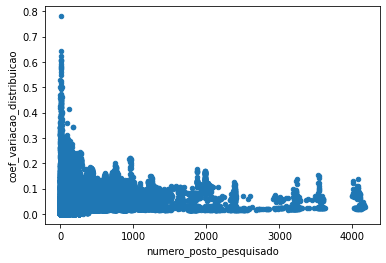

In [219]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='coef_variacao_distribuicao')


#### coef_variacao_revenda vs preco_medio_revenda

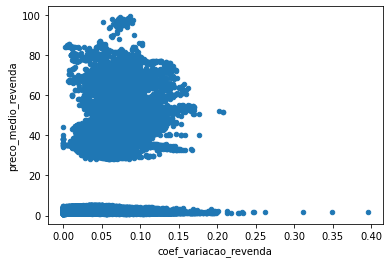

In [220]:
gas_prices_brazil_df.plot.scatter(x='coef_variacao_revenda',y='preco_medio_revenda')


#### coef_variacao_distribuicao vs preco_medio_distribuicao

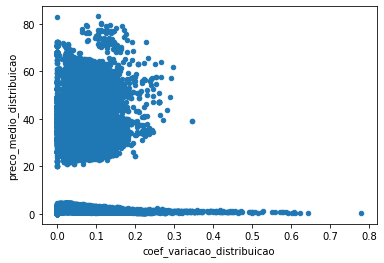

In [221]:
gas_prices_brazil_df.plot.scatter(x='coef_variacao_distribuicao',y='preco_medio_distribuicao')


---



---
# 5 Estatísticas Descritivas dos Dados com Visualizações
---



---



# Views



In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read the Dataset

In [223]:
gas_prices_brazil_df = pd.read_csv('https://drive.google.com/uc?id=1JPteFsXb2cq5ObAW6ZWHMe9OU7BT2i_l')

### Quantity

#### Region

Text(0.5, 0, 'Quantity')

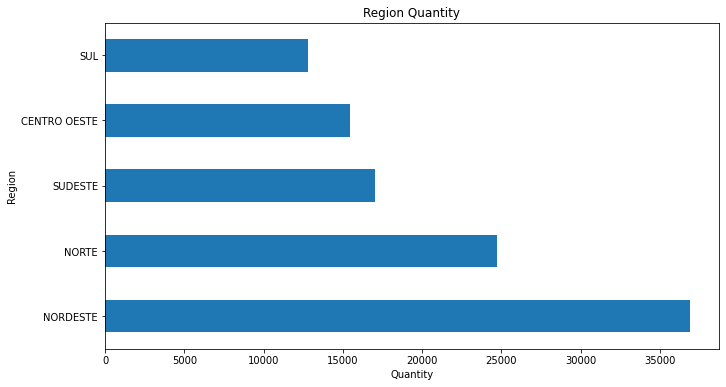

In [224]:
fig = plt.figure(figsize=(11,6))
fig = gas_prices_brazil_df['regiao'].value_counts().plot.barh()
fig.set_title('Region Quantity')
fig.set_ylabel('Region')
fig.set_xlabel('Quantity')

#### State

Text(0.5, 0, 'Quantity')

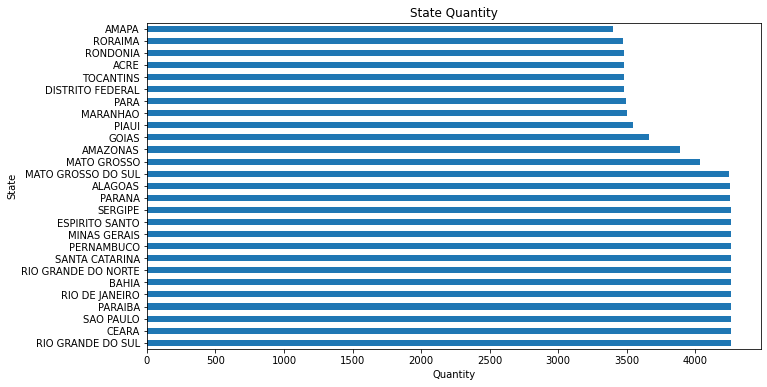

In [225]:
fig = plt.figure(figsize=(11,6))
fig = gas_prices_brazil_df['estado'].value_counts().plot.barh()
fig.set_title('State Quantity')
fig.set_ylabel('State')
fig.set_xlabel('Quantity')

Text(0.5, 0, 'Quantity')

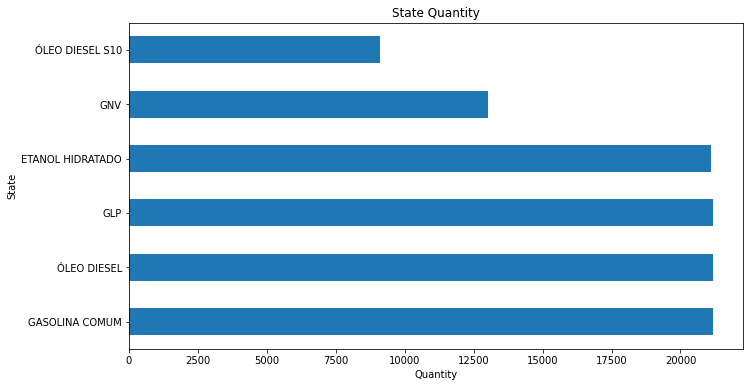

In [226]:
fig = plt.figure(figsize=(11,6))
fig = gas_prices_brazil_df['produto'].value_counts().plot.barh()
fig.set_title('State Quantity')
fig.set_ylabel('State')
fig.set_xlabel('Quantity')

#### Product

Text(0.5, 0, 'Quantity')

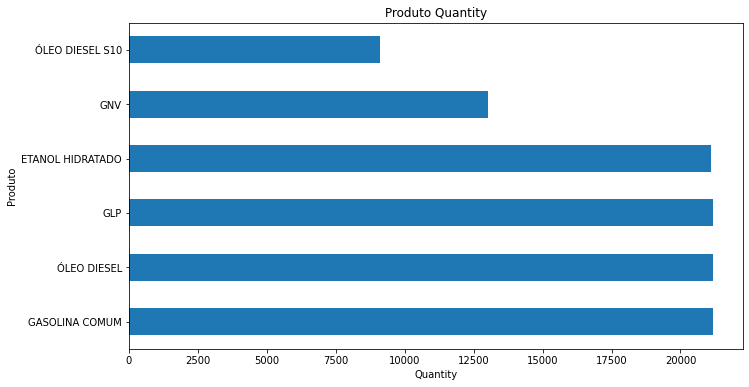

In [227]:
fig = plt.figure(figsize=(11,6))
fig = gas_prices_brazil_df['produto'].value_counts().plot.barh()
fig.set_title('Produto Quantity')
fig.set_ylabel('Produto')
fig.set_xlabel('Quantity')

Text(0.5, 0, 'Quantity')

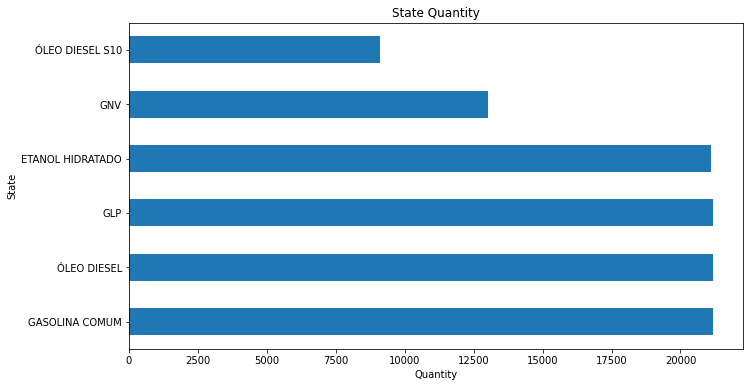

In [228]:
fig = plt.figure(figsize=(11,6))
fig = gas_prices_brazil_df['produto'].value_counts().plot.barh()
fig.set_title('State Quantity')
fig.set_ylabel('State')
fig.set_xlabel('Quantity')

### Outliers

In [229]:
gas_prices_brazil_df.columns

Index(['Unnamed: 0', 'regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'preco_medio_revenda', 'coef_variacao_revenda',
       'preco_medio_distribuicao', 'coef_variacao_distribuicao',
       'data_inicial', 'data_final', 'mes', 'ano', 'desvio_padrao_revenda',
       'preco_minimo_revenda', 'preco_maximo_revenda', 'margem_media_revenda',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'unidade_de_medida', 'regiao_code',
       'estado_code', 'produto_code', 'numero_posto_pesquisado_norm',
       'preco_medio_revenda_norm', 'coef_variacao_revenda_norm',
       'desvio_padrao_revenda_norm', 'preco_minimo_revenda_norm',
       'preco_maximo_revenda_norm', 'margem_media_revenda_norm',
       'preco_medio_distribuicao_norm', 'coef_variacao_distribuicao_norm',
       'desvio_padrao_distribuicao_norm', 'preco_minimo_distribuicao_norm',
       'preco_maximo_distribuicao_norm', 'preco_medio_revenda_dist',
       'coef_variacao_

#### numero_posto_pesquisado

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'Value')

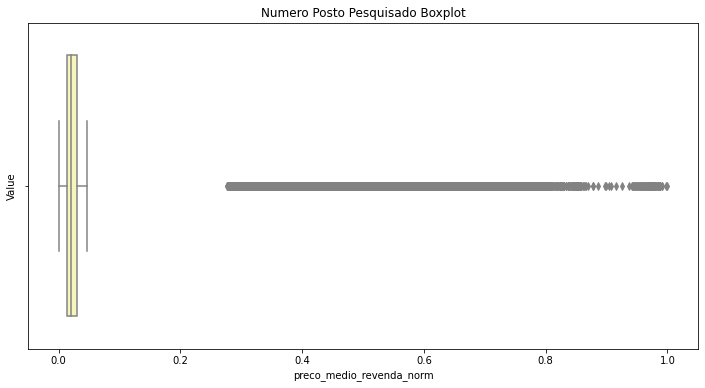

In [230]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
fig = sns.boxplot(x='preco_medio_revenda_norm', data= gas_prices_brazil_df, orient='v', color ='#ffffb2')
fig.set_title('Numero Posto Pesquisado Boxplot')
fig.set_ylabel('Value')

#### preco_medio_revenda

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'Value')

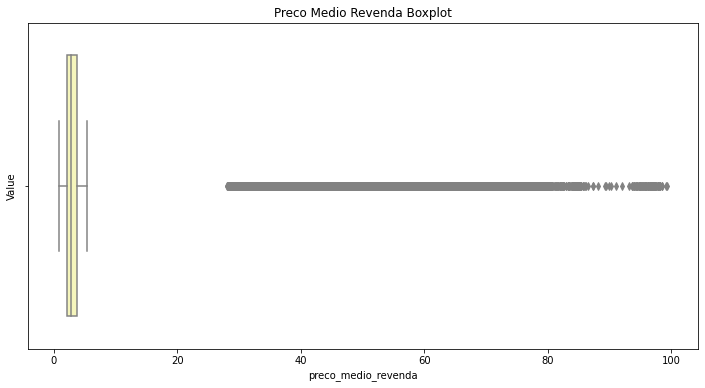

In [231]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
fig = sns.boxplot(x='preco_medio_revenda', data= gas_prices_brazil_df, orient='v', color ='#ffffb2')
fig.set_title('Preco Medio Revenda Boxplot')
fig.set_ylabel('Value')

#### coef_variacao_revenda

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, 'Value')

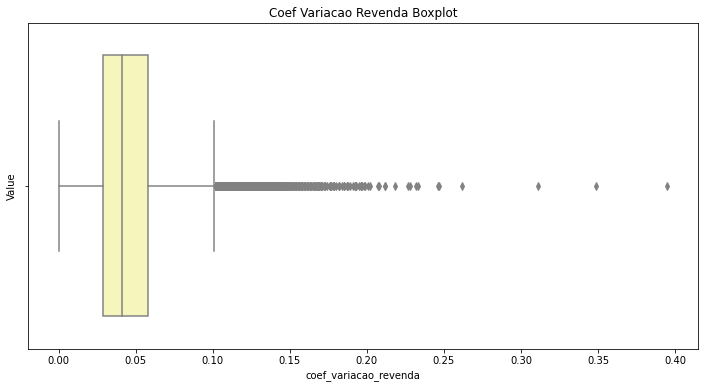

In [232]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
fig = sns.boxplot(x='coef_variacao_revenda', data= gas_prices_brazil_df, orient='v', color ='#ffffb2')
fig.set_title('Coef Variacao Revenda Boxplot')
fig.set_ylabel('Value')

### Histograma

#### numero_posto_pesquisado

Text(0, 0.5, 'numero_posto_pesquisado')

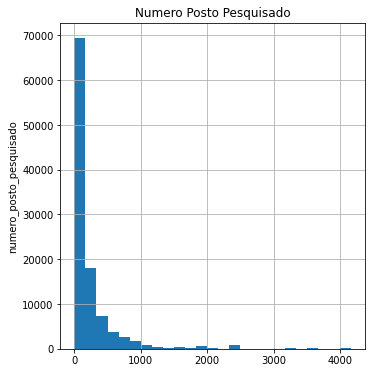

In [233]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = gas_prices_brazil_df['numero_posto_pesquisado'].hist(bins=25)
fig.set_title('Numero Posto Pesquisado')
fig.set_ylabel('numero_posto_pesquisado')

#### preco_medio_revenda

Text(0, 0.5, 'preco_medio_revenda')

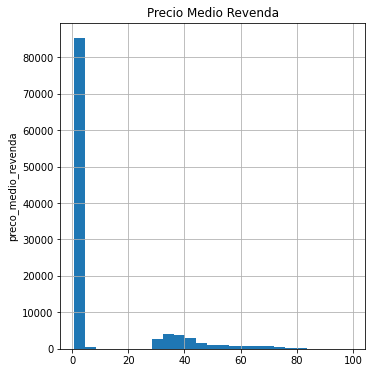

In [234]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = gas_prices_brazil_df['preco_medio_revenda'].hist(bins=25)
fig.set_title('Precio Medio Revenda')
fig.set_ylabel('preco_medio_revenda')

#### coef_variacao_revenda

Text(0, 0.5, 'Coef Variacao Revenda')

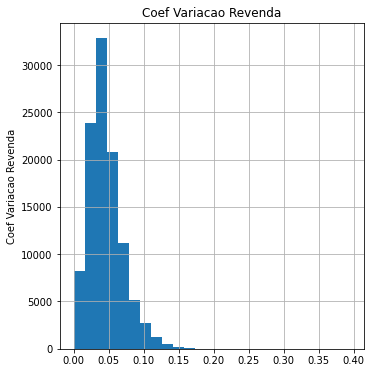

In [235]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = gas_prices_brazil_df['coef_variacao_revenda'].hist(bins=25)
fig.set_title('Coef Variacao Revenda')
fig.set_ylabel('Coef Variacao Revenda')

### Graphic Line

#### Regiao

Text(0.5, 1.0, 'numero_posto_pesquisado x regiao')

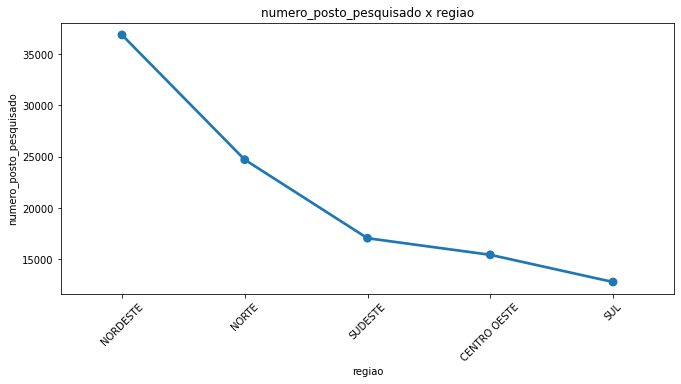

In [236]:
sdf = gas_prices_brazil_df.groupby('regiao')[['numero_posto_pesquisado']].count().sort_values(by='numero_posto_pesquisado',ascending=False).head(10)
sdf.reset_index(inplace=True)

plt.figure(figsize=(11,5))

sns.pointplot(x='regiao', y='numero_posto_pesquisado', data=sdf)

plt.xticks(rotation=45)
plt.title('numero_posto_pesquisado x regiao')

#### estado

Text(0.5, 1.0, 'estado x numero_posto_pesquisado')

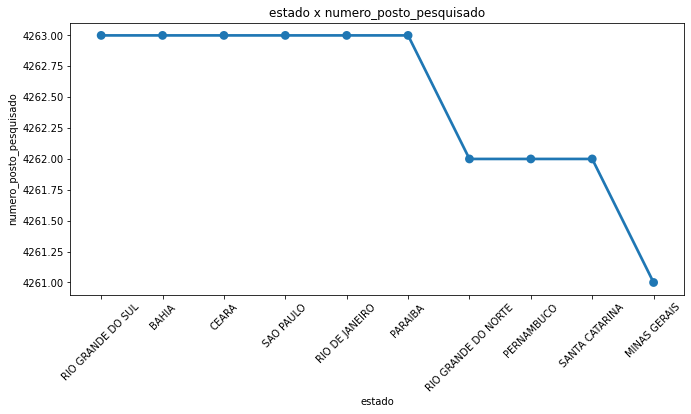

In [237]:
sdf = gas_prices_brazil_df.groupby('estado')[['numero_posto_pesquisado']].count().sort_values(by='numero_posto_pesquisado',ascending=False).head(10)
sdf.reset_index(inplace=True)

plt.figure(figsize=(11,5))

sns.pointplot(x='estado', y='numero_posto_pesquisado', data=sdf)

plt.xticks(rotation=45)
plt.title('estado x numero_posto_pesquisado')

#### coef_variacao_revenda

Text(0.5, 1.0, 'coef_variacao_revenda x numero_posto_pesquisado')

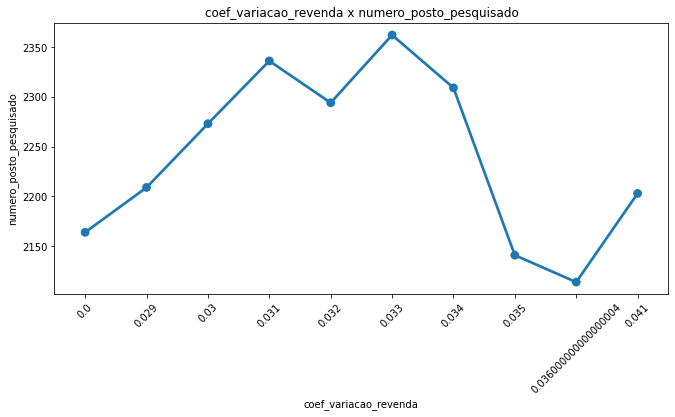

In [238]:
sdf = gas_prices_brazil_df.groupby('coef_variacao_revenda')[['numero_posto_pesquisado']].count().sort_values(by='numero_posto_pesquisado',ascending=False).head(10)
sdf.reset_index(inplace=True)

plt.figure(figsize=(11,5))

sns.pointplot(x='coef_variacao_revenda', y='numero_posto_pesquisado', data=sdf)

plt.xticks(rotation=45)
plt.title('coef_variacao_revenda x numero_posto_pesquisado')

## Heat Map

#### All variables

In [239]:
cluster = gas_prices_brazil_df

cluster = cluster.corr(method='spearman')

mask = np.zeros_like(cluster, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

Text(0.5, 0.98, 'Mapa de calor demonstrando a correlacao entre as variaveis')

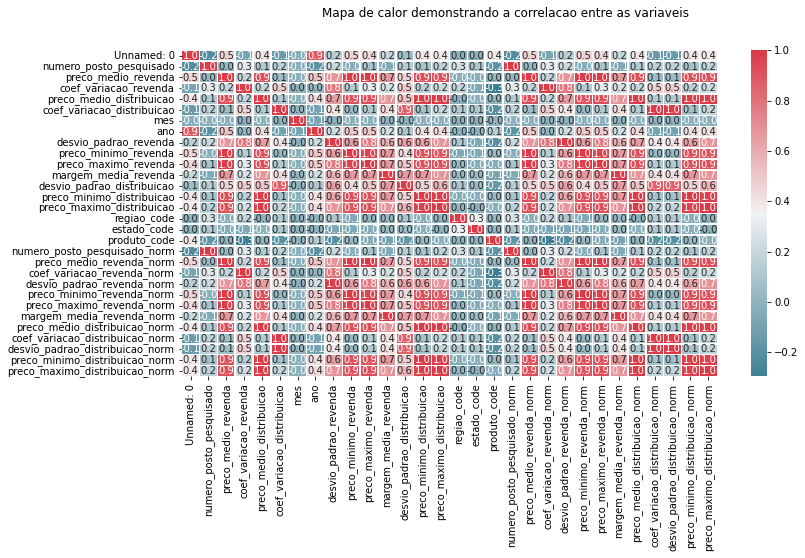

In [240]:
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(cluster, annot=True, linewidths=0.5, ax=ax, fmt='.1f', cmap=cmap )

fig.suptitle('Mapa de calor demonstrando a correlacao entre as variaveis')

#### Select variables

In [241]:
gas_prices_brazil_df.columns

Index(['Unnamed: 0', 'regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'preco_medio_revenda', 'coef_variacao_revenda',
       'preco_medio_distribuicao', 'coef_variacao_distribuicao',
       'data_inicial', 'data_final', 'mes', 'ano', 'desvio_padrao_revenda',
       'preco_minimo_revenda', 'preco_maximo_revenda', 'margem_media_revenda',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'unidade_de_medida', 'regiao_code',
       'estado_code', 'produto_code', 'numero_posto_pesquisado_norm',
       'preco_medio_revenda_norm', 'coef_variacao_revenda_norm',
       'desvio_padrao_revenda_norm', 'preco_minimo_revenda_norm',
       'preco_maximo_revenda_norm', 'margem_media_revenda_norm',
       'preco_medio_distribuicao_norm', 'coef_variacao_distribuicao_norm',
       'desvio_padrao_distribuicao_norm', 'preco_minimo_distribuicao_norm',
       'preco_maximo_distribuicao_norm', 'preco_medio_revenda_dist',
       'coef_variacao_

In [242]:
columns = ['regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'preco_medio_revenda', 'coef_variacao_revenda',
       'preco_medio_distribuicao', 'coef_variacao_distribuicao',
       'desvio_padrao_revenda',
       'preco_minimo_revenda', 'preco_maximo_revenda', 'margem_media_revenda',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao']

In [243]:
cluster = gas_prices_brazil_df[columns]

cluster = cluster.corr(method='spearman')

mask = np.zeros_like(cluster, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

Text(0.5, 0.98, 'Mapa de calor demonstrando a correlacao entre as variaveis')

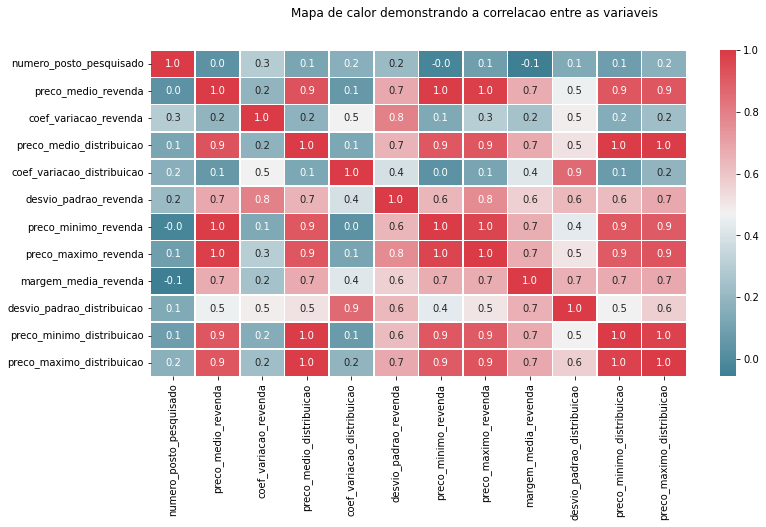

In [244]:
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(cluster, annot=True, linewidths=0.5, ax=ax, fmt='.1f', cmap=cmap )

fig.suptitle('Mapa de calor demonstrando a correlacao entre as variaveis')